<a href="https://colab.research.google.com/github/LabPEC/TCC-AnaliseAcoes-Rene2023/blob/main/C%C3%B3digo/TCC_AMAZON_Ren%C3%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalação de Bibliotecas**

In [ ]:
!sudo apt-get install build-essential python-dev python3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'python-dev-is-python2' instead of 'python-dev'
python3-dev is already the newest version (3.8.2-0ubuntu2).
python-dev-is-python2 is already the newest version (2.7.17-4).
build-essential is already the newest version (12.8ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!pip install ta-lib

In [ ]:
import talib

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sbn
import numpy as np
import plotly.express as px
import math
from shapely.geometry import LineString

In [ ]:
acao = yf.Ticker('AMZN')

# **Criação do DataFrame**

In [ ]:
df = yf.download('AMZN','2001-01-01','2023-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.790625,0.800000,0.681250,0.693750,0.693750,184070000
2001-01-03,0.681250,0.893750,0.678125,0.878125,0.878125,293608000
2001-01-04,0.850000,0.878125,0.771875,0.775000,0.775000,212410000
2001-01-05,0.775000,0.793750,0.678125,0.728125,0.728125,175976000
2001-01-08,0.721875,0.778125,0.687500,0.746875,0.746875,208894000


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.shape

(5613, 6)

# **Indicadores**







## **Média Móvel**

### Cálculo da Média Móvel

In [ ]:
df1348 = df.drop(['Open','High','Low','Close','Volume'], axis = 1) #removendo as colunas que não serão necessárias

In [ ]:
df1348['Media_13']=df1348['Adj Close'].rolling(window=13, min_periods=1).mean() # calculando a média móvel de 13 períodos (curto prazo)
df1348['Media_48']=df1348['Adj Close'].rolling(window=48, min_periods=1).mean() # calculando a média móvel de 48 períodos (longo prazo)
df1348.head()

,Adj Close,Media_13,Media_48
Date,,,
2001-01-02,0.693750,0.693750,0.693750
2001-01-03,0.878125,0.785938,0.785938
2001-01-04,0.775000,0.782292,0.782292
2001-01-05,0.728125,0.768750,0.768750
2001-01-08,0.746875,0.764375,0.764375


### Gráfico Média Móvel

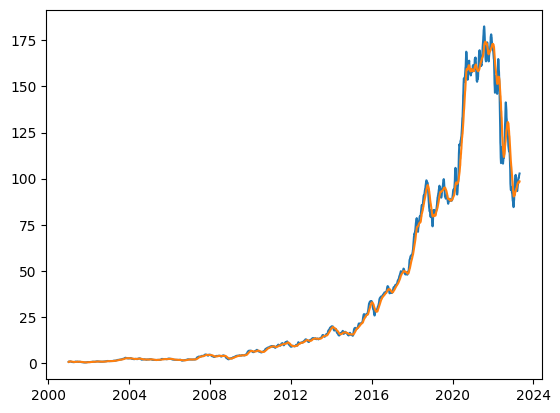

In [ ]:
#plotando essas duas médias em um gráfico usando plot
plt.plot(df1348['Media_13'])
plt.plot(df1348['Media_48']) 

In [ ]:
#criando uma coluna condicional onde caso a média móvel de curto prazo for maior que a de longo prazo, 1, se não, 0
df1348['Sinal']=np.where(df1348['Media_13']>df1348['Media_48'],1,0) 
df1348.sample(10)

,Adj Close,Media_13,Media_48,Sinal
Date,,,,
2022-02-09,161.189499,148.878538,161.984063,0
2005-12-29,2.399500,2.443077,2.305010,1
2019-10-30,88.999496,88.467999,88.663177,0
2017-05-12,48.067501,47.001230,44.667739,1
2001-11-28,0.579500,0.461154,0.394198,1
2001-09-27,0.310000,0.373423,0.521187,0
2012-11-12,11.323500,11.559577,12.331146,0
2017-10-19,49.330502,49.496615,48.641240,1
2012-10-15,12.209000,12.593038,12.448740,1


In [ ]:
#Quando o Sinal muda, por exemplo, de 0 para 1, uma média móvel de curto prazo cruza acima uma média movel de longo prazo, 
# representando um ponto de compra. De 1 para 0, um ponto de venda. Assim, foi criada uma coluna 'POS'.
df1348['POS'] = df1348['Sinal'].diff()

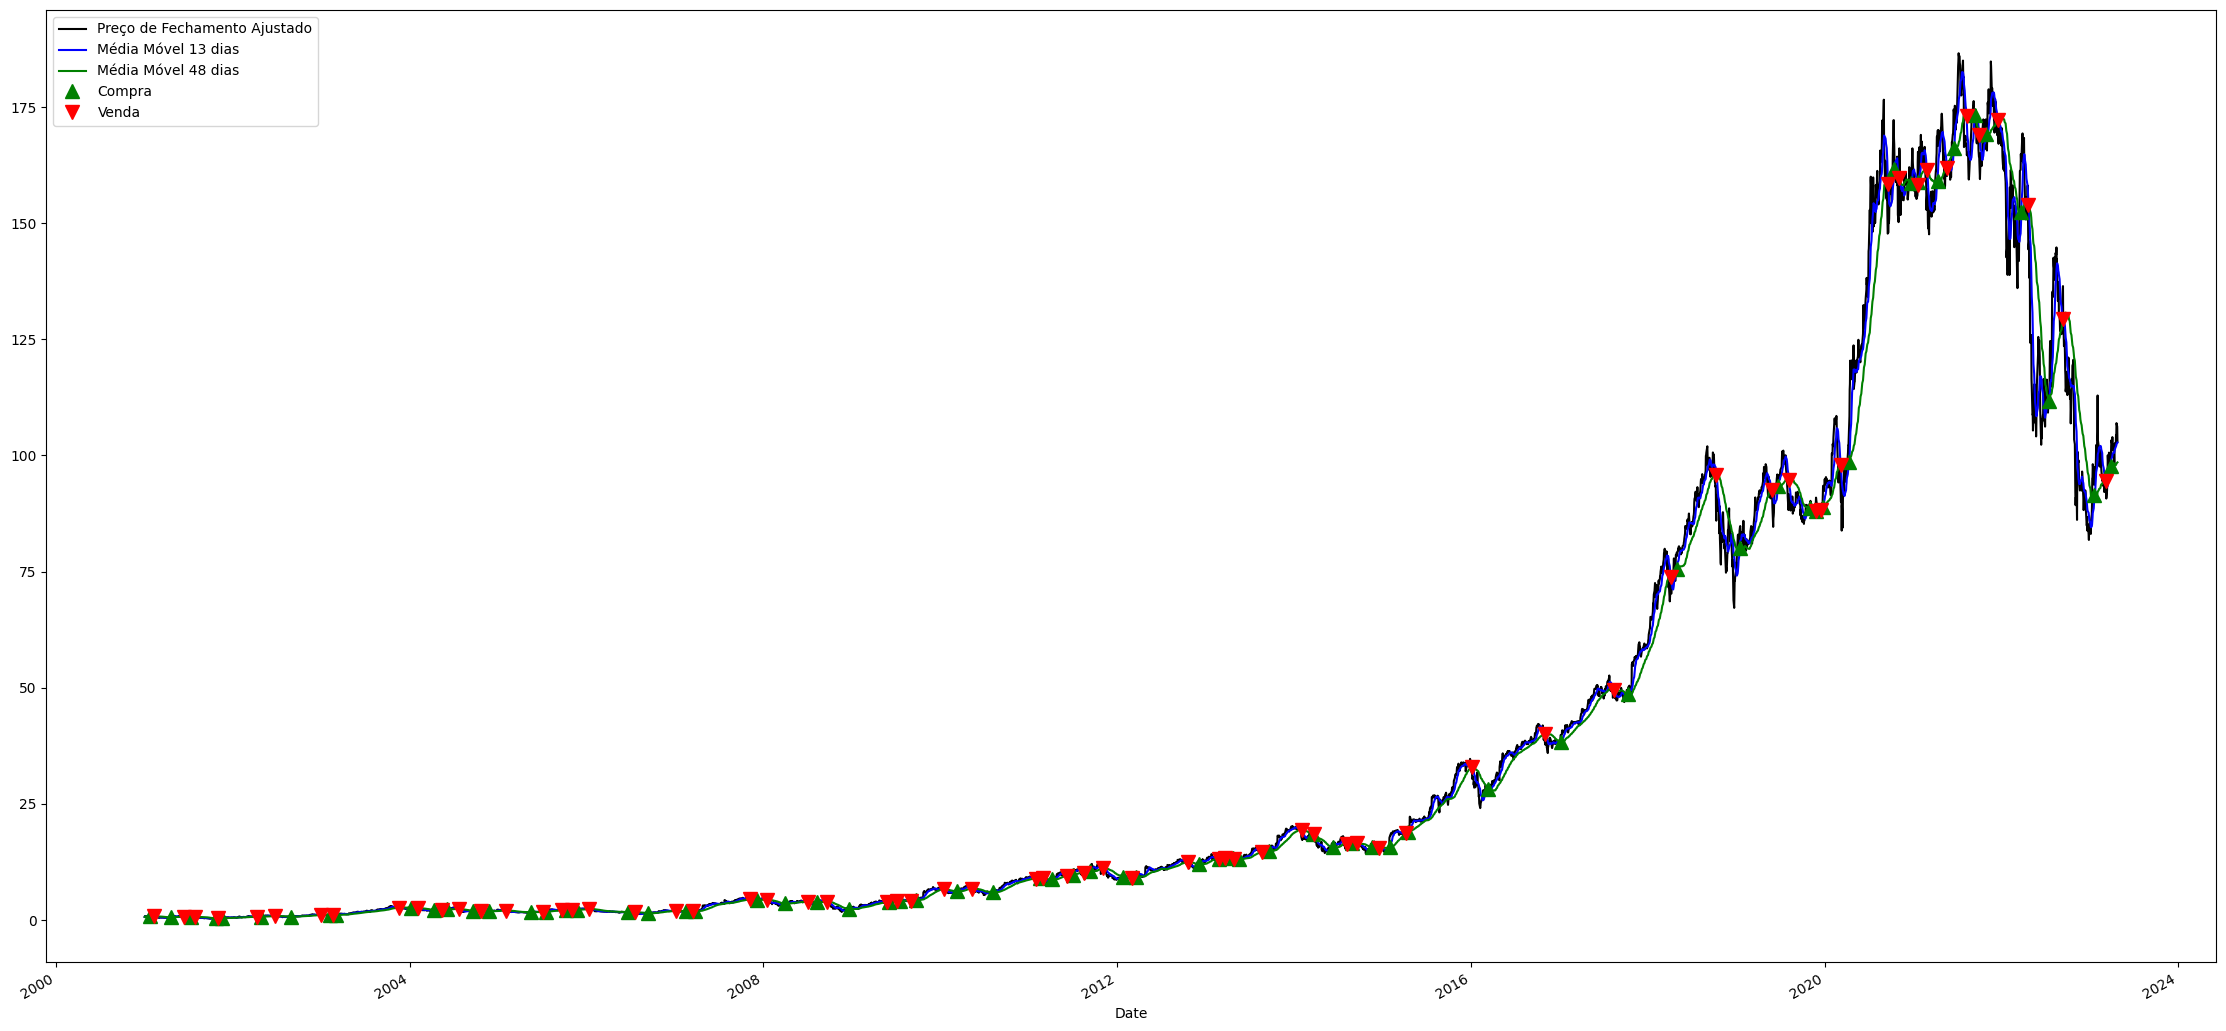

In [ ]:
#plotando o gráfico com as indicações de compra e venda
plt.figure(figsize = (28,14))
df1348['Adj Close'].plot(color='k',label = "Preço de Fechamento Ajustado")
df1348['Media_13'].plot(color='b',label = "Média Móvel 13 dias")
df1348['Media_48'].plot(color='g',label = "Média Móvel 48 dias")

plt.plot(df1348[df1348['POS']==1].index,
         df1348['Media_13'][df1348['POS']==1],
         '^', markersize = 10, color = 'g', label = 'Compra')

plt.plot(df1348[df1348['POS']==-1].index,
         df1348['Media_13'][df1348['POS']==-1],
         'v', markersize = 10, color = 'r', label = 'Venda')

plt.legend()

### Taxa de Acerto Média Móvel

In [ ]:
dfMM = df1348.loc[(df1348['POS']!=0)] #extraindo apenas os sinais de compra e venda (pos = 1 ou -1)

In [ ]:
print(dfMM.to_markdown())

| Date                |   Adj Close |   Media_13 |   Media_48 |   Sinal |   POS |
|:--------------------|------------:|-----------:|-----------:|--------:|------:|
| 2001-01-02 00:00:00 |     0.69375 |   0.69375  |   0.69375  |       0 |   nan |
| 2001-01-22 00:00:00 |     0.925   |   0.863462 |   0.851339 |       1 |     1 |
| 2001-02-09 00:00:00 |     0.66875 |   0.847596 |   0.853041 |       0 |    -1 |
| 2001-04-19 00:00:00 |     0.7995  |   0.600385 |   0.585831 |       1 |     1 |
| 2001-06-15 00:00:00 |     0.6245  |   0.768731 |   0.768844 |       0 |    -1 |
| 2001-07-13 00:00:00 |     0.849   |   0.750885 |   0.746156 |       1 |     1 |
| 2001-07-30 00:00:00 |     0.6275  |   0.738423 |   0.740146 |       0 |    -1 |
| 2001-10-25 00:00:00 |     0.3885  |   0.414077 |   0.41375  |       1 |     1 |
| 2001-11-02 00:00:00 |     0.3355  |   0.387692 |   0.393927 |       0 |    -1 |
| 2001-11-19 00:00:00 |     0.4595  |   0.385538 |   0.378521 |       1 |     1 |
| 2002-04-11 00:

In [ ]:
dfMM.shape

(138, 5)

In [ ]:
dfMM['DiffPreco'] = dfMM['Adj Close'].diff() # coluna que calcula a diferença entre as compras e vendas, em reais

<ipython-input-19-539a1855a79e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMM['DiffPreco'] = dfMM['Adj Close'].diff() # coluna que calcula a diferença entre as compras e vendas, em reais


In [ ]:
dfMM['DiffPreco(%)'] = dfMM['Adj Close'].pct_change() # coluna que calcula a variação dos preços entre as compras e vendas, em porcentagem

<ipython-input-20-a934ab1b2431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMM['DiffPreco(%)'] = dfMM['Adj Close'].pct_change() # coluna que calcula a variação dos preços entre as compras e vendas, em porcentagem


In [ ]:
#função que sinaliza lucro caso a ação tenha valorizado no ponto de venda, de acordo com a ultima compra, ou prejuízo, caso contrário.
def new_column(dfMM):
    if dfMM['POS'] == -1 and dfMM['DiffPreco']>0:
        return "Lucro"
    elif dfMM['POS'] == -1 and dfMM['DiffPreco']<0:
        return "Prejuízo"
    else:
        return ""

In [ ]:
dfMM['Lucro/Prejuízo'] = dfMM.apply(new_column, axis=1) # criação de uma nova coluna aplicando a função definida acima

<ipython-input-22-9ee5648b46d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMM['Lucro/Prejuízo'] = dfMM.apply(new_column, axis=1) # criação de uma nova coluna aplicando a função definida acima


In [ ]:
print(dfMM.to_markdown())

| Date                |   Adj Close |   Media_13 |   Media_48 |   Sinal |   POS |    DiffPreco |   DiffPreco(%) | Lucro/Prejuízo   |
|:--------------------|------------:|-----------:|-----------:|--------:|------:|-------------:|---------------:|:-----------------|
| 2001-01-02 00:00:00 |     0.69375 |   0.69375  |   0.69375  |       0 |   nan | nan          |  nan           |                  |
| 2001-01-22 00:00:00 |     0.925   |   0.863462 |   0.851339 |       1 |     1 |   0.23125    |    0.333333    |                  |
| 2001-02-09 00:00:00 |     0.66875 |   0.847596 |   0.853041 |       0 |    -1 |  -0.25625    |   -0.277027    | Prejuízo         |
| 2001-04-19 00:00:00 |     0.7995  |   0.600385 |   0.585831 |       1 |     1 |   0.13075    |    0.195514    |                  |
| 2001-06-15 00:00:00 |     0.6245  |   0.768731 |   0.768844 |       0 |    -1 |  -0.175      |   -0.218887    | Prejuízo         |
| 2001-07-13 00:00:00 |     0.849   |   0.750885 |   0.746156 |      

In [ ]:
lucro_reais = dfMM.loc[dfMM['Lucro/Prejuízo']=='Lucro']['DiffPreco'].sum() #calculando ganhos, em reais, por ação
prejuízo_reais=dfMM.loc[dfMM['Lucro/Prejuízo']=='Prejuízo']['DiffPreco'].sum()#calculando perdas, em reais, por ação
resultado_reais = lucro_reais+prejuízo_reais #lucro ou prejuízo final
print(resultado_reais)

39.056755632162094


In [ ]:
dfMM['DiffPreco'].sum()

99.55624997615814

In [ ]:
dfMM['Lucro/Prejuízo'].value_counts()

            70
Prejuízo    41
Lucro       27
Name: Lucro/Prejuízo, dtype: int64

In [ ]:
precisao = (11/24)*100 #taxa de acerto
print(precisao) 

45.83333333333333


In [ ]:
#Comprar em 37.6835 e vender em 168,871: 131.18 (448,13%)
#Inicial: 37.6835
#Lucro: 20.635
#Final: 58,3185 (+154,76%)

## **Convergência-Divergência Da Média Móvel (MACD)**

### Cálculo MACD

In [ ]:
dfMACD=df.drop(['Open','High','Low','Close','Volume'], axis = 1)
dfMACD.head()

,Adj Close
Date,
2001-01-02,0.693750
2001-01-03,0.878125
2001-01-04,0.775000
2001-01-05,0.728125
2001-01-08,0.746875


In [ ]:
dfMACD['macd'] = dfMACD['Adj Close'].ewm(span = 12, adjust = False).mean()-dfMACD['Adj Close'].ewm(span = 26, adjust = False).mean()
dfMACD['exp3'] = dfMACD['macd'].ewm(span = 9, adjust = False).mean()

In [ ]:
dfMACD.head()

,Adj Close,macd,exp3
Date,,,
2001-01-02,0.693750,0.000000,0.000000
2001-01-03,0.878125,0.014708,0.002942
2001-01-04,0.775000,0.017837,0.005921
2001-01-05,0.728125,0.016346,0.008006
2001-01-08,0.746875,0.016488,0.009702


### Gráfico MACD

In [ ]:
dfMACD['Sinal']=np.where(dfMACD['macd']>dfMACD['exp3'],1,0)
dfMACD.sample(10)

,Adj Close,macd,exp3,Sinal
Date,,,,
2007-09-25,4.674000,0.186303,0.159026,1
2014-02-04,17.397499,-0.381360,-0.069533,0
2002-03-22,0.776500,0.020471,0.028365,0
2006-12-05,1.949000,0.038369,0.069743,0
2013-08-07,14.845500,0.185622,0.276293,0
2009-03-19,3.505000,0.135659,0.115822,1
2008-09-17,3.577000,-0.055303,-0.010296,0
2005-03-29,1.671500,-0.047579,-0.048682,1
2018-04-20,76.374496,0.299154,-0.370478,1


In [ ]:
dfMACD['POS'] = dfMACD['Sinal'].diff()
dfMACD.sample(10)

,Adj Close,macd,exp3,Sinal,POS
Date,,,,,
2010-06-08,5.942000,-0.146632,-0.142988,0,-1.0
2018-10-16,90.998001,-2.126692,-1.190492,0,0.0
2002-09-27,0.850500,0.019856,0.021277,0,0.0
2017-01-23,40.894001,0.618233,0.475473,1,0.0
2016-05-05,32.954498,0.973323,0.803841,1,0.0
2022-08-01,135.389999,4.181245,2.193826,1,0.0
2015-11-12,33.279999,1.552080,1.405488,1,0.0
2019-06-27,95.213997,0.940221,0.649156,1,0.0
2005-10-27,1.953000,-0.009556,0.015564,0,0.0


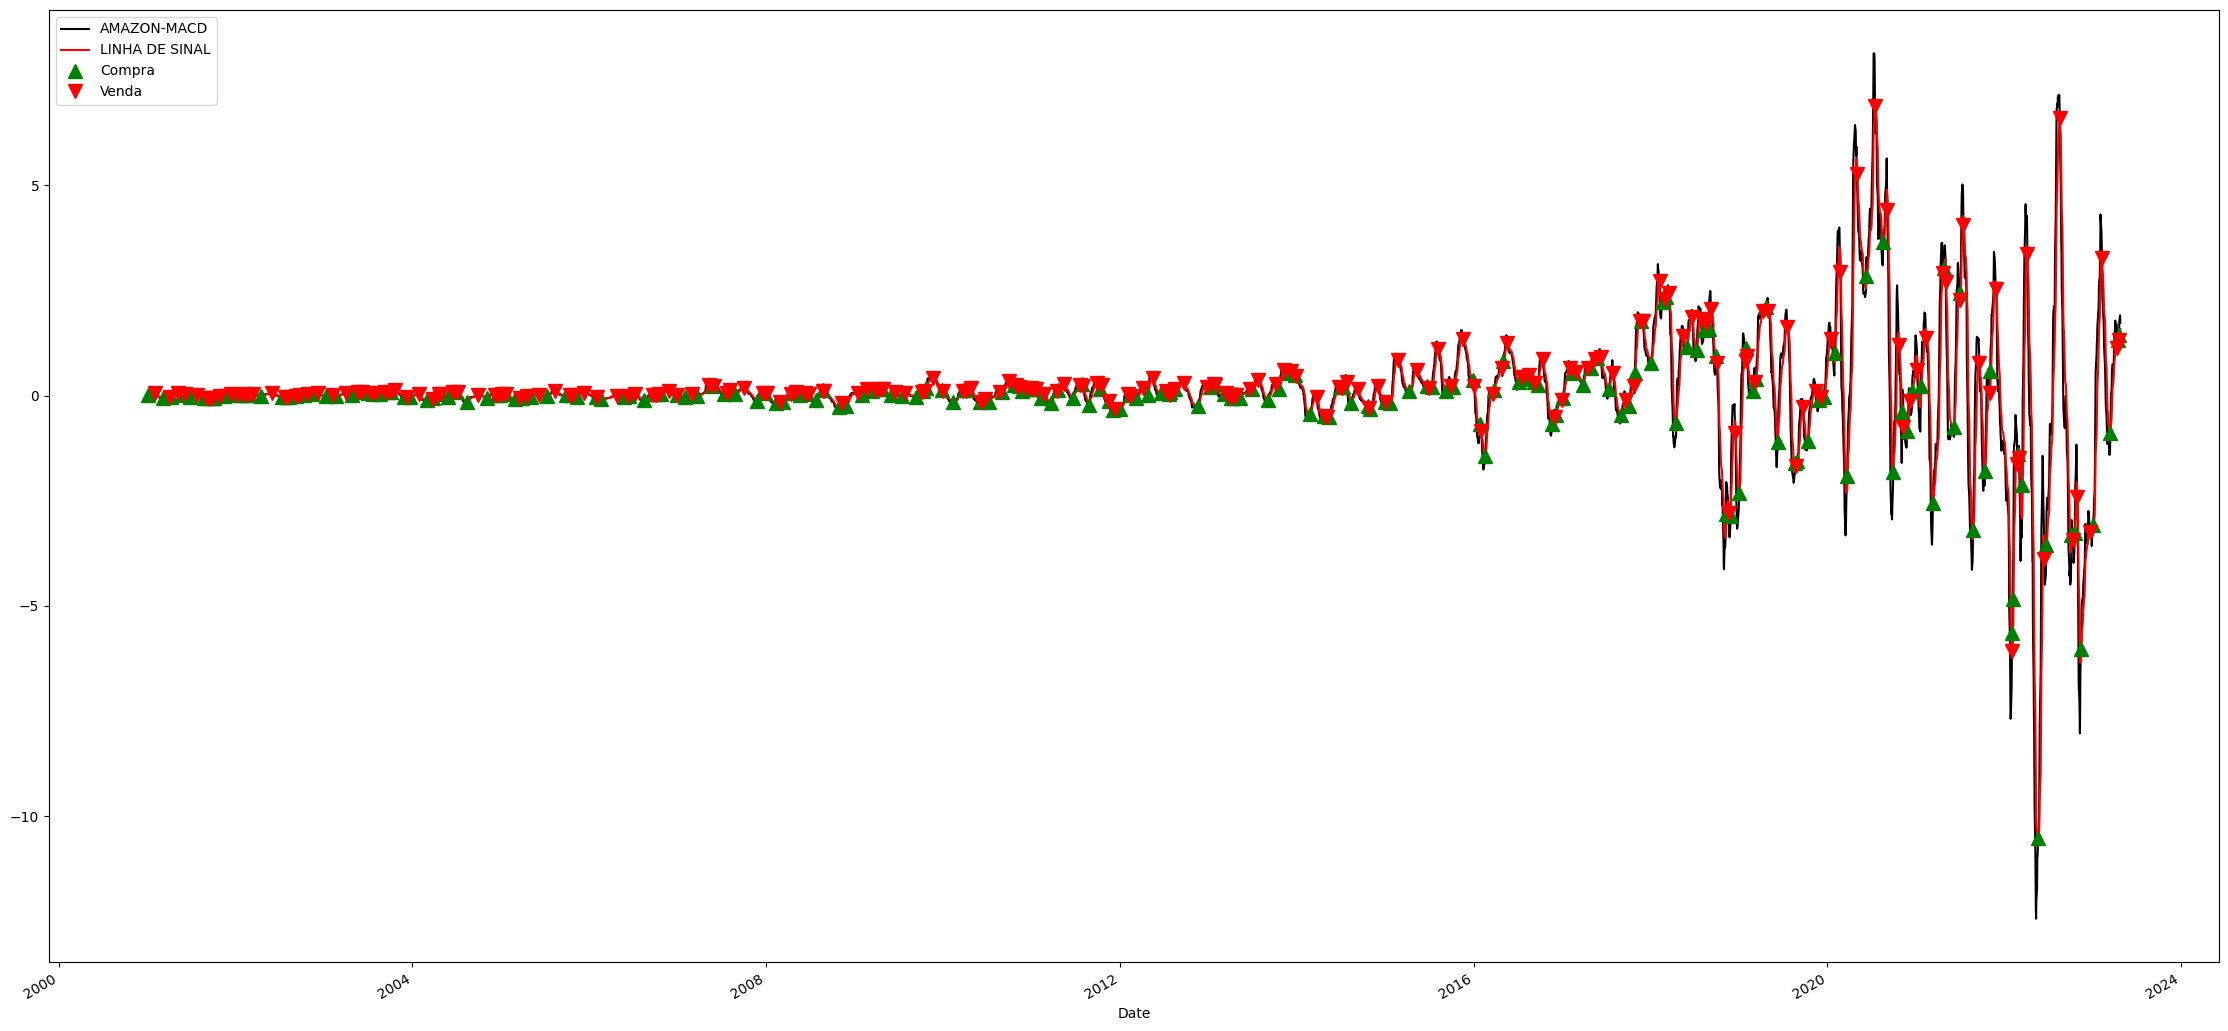

In [ ]:
plt.figure(figsize = (28,14))
dfMACD['macd'].plot(color='k',label = "AMAZON-MACD")
dfMACD['exp3'].plot(color='r',label = "LINHA DE SINAL")

plt.plot(dfMACD[dfMACD['POS']==1].index,
         dfMACD['macd'][dfMACD['POS']==1],
         '^', markersize = 10, color = 'g', label = 'Compra')

plt.plot(dfMACD[dfMACD['POS']==-1].index,
         dfMACD['macd'][dfMACD['POS']==-1],
         'v', markersize = 10, color = 'r', label = 'Venda')

plt.legend()

### Taxa de Acerto MACD

In [ ]:
dfMACD=dfMACD.loc[(dfMACD['POS']!=0)]

In [ ]:
dfMACD['DiffPreco'] = dfMACD['Adj Close'].diff()

<ipython-input-36-88ebbcb7b0da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMACD['DiffPreco'] = dfMACD['Adj Close'].diff()


In [ ]:
dfMACD['DiffPreco(%)'] = dfMACD['Adj Close'].pct_change()

<ipython-input-37-a09b66d76666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMACD['DiffPreco(%)'] = dfMACD['Adj Close'].pct_change()


In [ ]:
def new_column1(dfMACD):
    if dfMACD['POS'] == -1 and dfMACD['DiffPreco']>0:
        return "Lucro"
    elif dfMACD['POS'] == -1 and dfMACD['DiffPreco']<0:
        return "Prejuízo"
    else:
        return ""

In [ ]:
dfMACD['Lucro/Prejuízo'] = dfMACD.apply(new_column1, axis=1)

In [ ]:
lucro_reais = dfMACD.loc[dfMACD['Lucro/Prejuízo']=='Lucro']['DiffPreco'].sum()
prejuízo_reais=dfMACD.loc[dfMACD['Lucro/Prejuízo']=='Prejuízo']['DiffPreco'].sum()
resultado_reais = lucro_reais+prejuízo_reais
print(resultado_reais)

48.80001747608185


In [ ]:
dfMACD['Lucro/Prejuízo'].value_counts()

            217
Prejuízo    115
Lucro       100
Name: Lucro/Prejuízo, dtype: int64

In [ ]:
precisao_MACD = (29/49)*100
print(precisao_MACD)

59.183673469387756


Quando MACD cruza de baixo para cima a linha de sinal, tem-se
um indicativo de alta e quando MACD cruza de cima para baixo, tem-se um indicativo
de baixa.

## **On Balance Volume**

### Cálculo On Balance Volume

In [ ]:
dfOBV = df.reset_index()
dfOBV.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,0.790625,0.800000,0.681250,0.693750,0.693750,184070000
1,2001-01-03,0.681250,0.893750,0.678125,0.878125,0.878125,293608000
2,2001-01-04,0.850000,0.878125,0.771875,0.775000,0.775000,212410000
3,2001-01-05,0.775000,0.793750,0.678125,0.728125,0.728125,175976000
4,2001-01-08,0.721875,0.778125,0.687500,0.746875,0.746875,208894000


In [ ]:
dfOBV.drop(['Open','High','Low','Close'], axis = 1, inplace=True)
dfOBV=dfOBV.set_index(pd.DatetimeIndex(dfOBV['Date'].values))
dfOBV.drop(['Date'], axis = 1, inplace=True)

In [ ]:
OBV = []
OBV.append(0)
for i in range(1,len(dfOBV['Adj Close'])):
  if dfOBV['Adj Close'][i]>dfOBV['Adj Close'][i-1]:
    OBV.append(OBV[-1]+dfOBV.Volume[i])
  elif dfOBV['Adj Close'][i]<dfOBV['Adj Close'][i-1]:
    OBV.append(OBV[-1]-dfOBV.Volume[i])
  else:
    OBV.append(OBV[-1])

In [ ]:
dfOBV['OBV']=OBV

In [ ]:
dfOBV.head()

,Adj Close,Volume,OBV
2001-01-02,0.693750,184070000,0
2001-01-03,0.878125,293608000,293608000
2001-01-04,0.775000,212410000,81198000
2001-01-05,0.728125,175976000,-94778000
2001-01-08,0.746875,208894000,114116000


In [ ]:
dfOBV['OBV_MME'] = dfOBV['OBV'].ewm(span=20).mean()
dfOBV.head()

,Adj Close,Volume,OBV,OBV_MME
2001-01-02,0.693750,184070000,0,0.000000e+00
2001-01-03,0.878125,293608000,293608000,1.541442e+08
2001-01-04,0.775000,212410000,81198000,1.273588e+08
2001-01-05,0.728125,175976000,-94778000,6.323134e+07
2001-01-08,0.746875,208894000,114116000,7.553990e+07


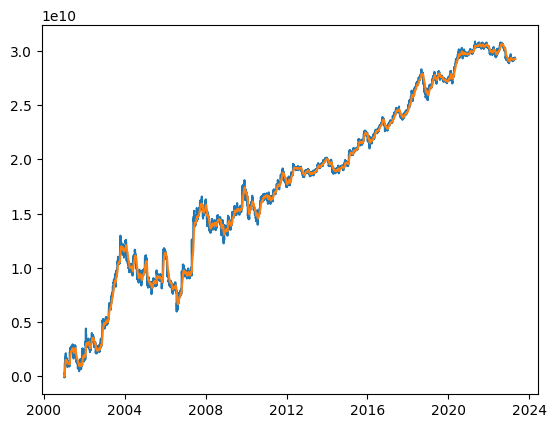

In [ ]:
plt.plot(dfOBV['OBV'])
plt.plot(dfOBV['OBV_MME'])

### Gráfico On Balance Volume

In [ ]:
dfOBV['Sinal']=np.where(dfOBV['OBV']>dfOBV['OBV_MME'],1,0)
dfOBV.sample(10)

,Adj Close,Volume,OBV,OBV_MME,Sinal
2021-08-24,165.289001,51036000,30384460000,3.039188e+10,0
2019-10-11,86.596001,65100000,27252334000,2.732793e+10,0
2016-04-28,30.100000,157452000,21872046000,2.203141e+10,0
2016-04-13,30.740999,84566000,22074964000,2.185927e+10,1
2002-07-15,0.797000,120522000,2952436000,3.020822e+09,0
2013-02-04,12.999000,74472000,18746028000,1.892909e+10,0
2019-01-07,81.475502,159864000,26162646000,2.596222e+10,1
2002-10-17,0.937000,283618000,2647342000,2.632576e+09,1
2012-04-25,9.721000,79102000,18741970000,1.858259e+10,1
2003-11-28,2.698500,79660000,11955664000,1.172659e+10,1


In [ ]:
dfOBV['POS'] = dfOBV['Sinal'].diff()

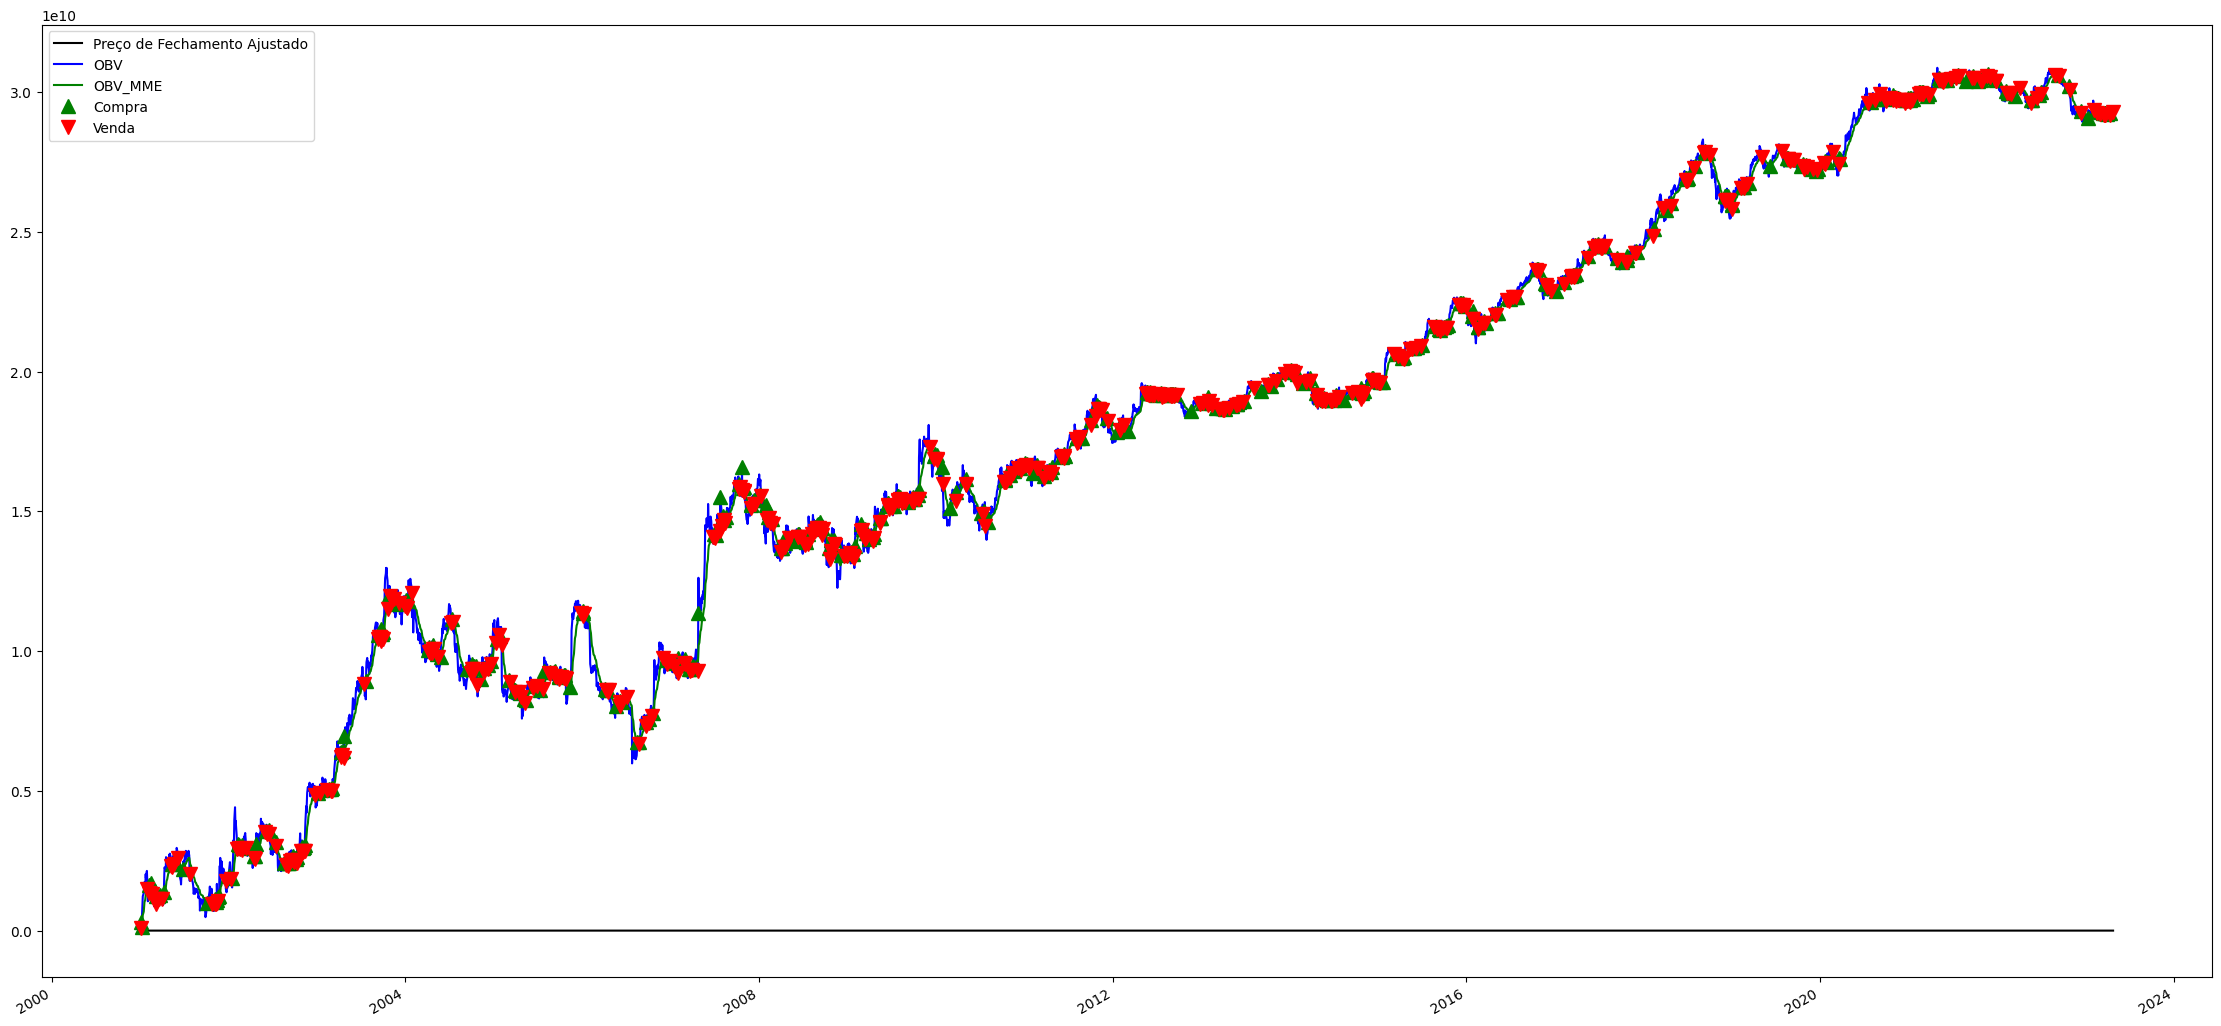

In [ ]:
plt.figure(figsize = (28,14))
dfOBV['Adj Close'].plot(color='k',label = "Preço de Fechamento Ajustado")
dfOBV['OBV'].plot(color='b',label = "OBV")
dfOBV['OBV_MME'].plot(color='g',label = "OBV_MME")

plt.plot(dfOBV[dfOBV['POS']==1].index,
         dfOBV['OBV'][dfOBV['POS']==1],
         '^', markersize = 10, color = 'g', label = 'Compra')

plt.plot(dfOBV[dfOBV['POS']==-1].index,
         dfOBV['OBV'][dfOBV['POS']==-1],
         'v', markersize = 10, color = 'r', label = 'Venda')

plt.legend()

### Taxa de Acerto OBV

In [ ]:
dfOBV = dfOBV.loc[(dfOBV['POS']!=0)]

In [ ]:
dfOBV['DiffPreco'] = dfOBV['Adj Close'].diff()

<ipython-input-56-d23e803a4349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOBV['DiffPreco'] = dfOBV['Adj Close'].diff()


In [ ]:
dfOBV['DiffPreco(%)'] = dfOBV['Adj Close'].pct_change()

<ipython-input-57-34b78e37e527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOBV['DiffPreco(%)'] = dfOBV['Adj Close'].pct_change()


In [ ]:
def new_column2(dfOBV):
    if dfOBV['POS'] == -1 and dfOBV['DiffPreco']>0:
        return "Lucro"
    elif dfOBV['POS'] == -1 and dfOBV['DiffPreco']<0:
        return "Prejuízo"
    else:
        return ""

In [ ]:
dfOBV['Lucro/Prejuízo'] = dfOBV.apply(new_column2, axis=1)

<ipython-input-59-aaf4173d9b4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOBV['Lucro/Prejuízo'] = dfOBV.apply(new_column2, axis=1)


In [ ]:
lucro_reais = dfOBV.loc[dfOBV['Lucro/Prejuízo']=='Lucro']['DiffPreco'].sum()
prejuízo_reais=dfOBV.loc[dfOBV['Lucro/Prejuízo']=='Prejuízo']['DiffPreco'].sum()
resultado_reais = lucro_reais+prejuízo_reais
print(resultado_reais)

100.25103229284286


In [ ]:
dfOBV['DiffPreco'].sum()

102.25124967098236

In [ ]:
dfOBV['Lucro/Prejuízo'].value_counts()

            460
Prejuízo    310
Lucro       149
Name: Lucro/Prejuízo, dtype: int64

In [ ]:
precisao_OBV = (36/96)*100
print(precisao_OBV)

37.5


## **Estocástico**

### Cálculo Estocástico

In [ ]:
dfEST = df.drop(['Close','Volume'], axis = 1)

In [ ]:
dfEST['H14'] = dfEST['High'].rolling(14).max()

In [ ]:
dfEST['L14'] = dfEST['Low'].rolling(14).min()

In [ ]:
dfEST['%K'] = (dfEST['Adj Close'] - dfEST['L14']) *100/(dfEST['H14']-dfEST['L14'])

In [ ]:
dfEST['%D'] = dfEST['%K'].rolling(3).mean()

Este indicador é composto de duas linhas, %K e %D, sendo %D uma média
móvel simples de três períodos de %K. Um sinal de compra é indicado quando %K
cruza de baixo para cima %D. Um sinal de venda é indicado quando %K cruza de
cima para baixo a linha %D

### Gráfico Estocástico

In [ ]:
dfEST['Sinal']=np.where(dfEST['%D']<dfEST['%K'],1,0)
dfEST.sample(10)

,Open,High,Low,Adj Close,H14,L14,%K,%D,Sinal
Date,,,,,,,,,
2005-08-25,2.127000,2.140000,2.104000,2.115500,2.322000,2.104000,5.275177,7.129150,0
2006-07-05,1.914000,1.921500,1.839000,1.855500,1.942000,1.683500,66.537696,86.588952,0
2005-02-07,1.791000,1.792000,1.777500,1.784500,2.237000,1.726500,11.361405,11.459849,0
2011-07-20,11.002500,11.010000,10.720500,10.777500,11.010000,10.025000,76.395946,78.797738,0
2017-03-02,42.653999,42.741001,42.363998,42.445499,43.042999,41.142502,68.560871,72.313804,0
2013-06-25,13.615000,13.673500,13.450000,13.604500,14.167000,13.210500,41.191849,41.844359,0
2004-09-30,2.027500,2.064000,2.010500,2.043000,2.214000,1.941000,37.362636,37.785822,0
2017-03-22,42.021500,42.468498,41.952499,42.403000,43.139999,41.952499,37.936883,47.518320,0
2017-04-18,45.049500,45.480499,45.039001,45.188999,46.186001,42.951000,69.180789,65.460413,1


In [ ]:
dfEST['POS'] = dfEST['Sinal'].diff()

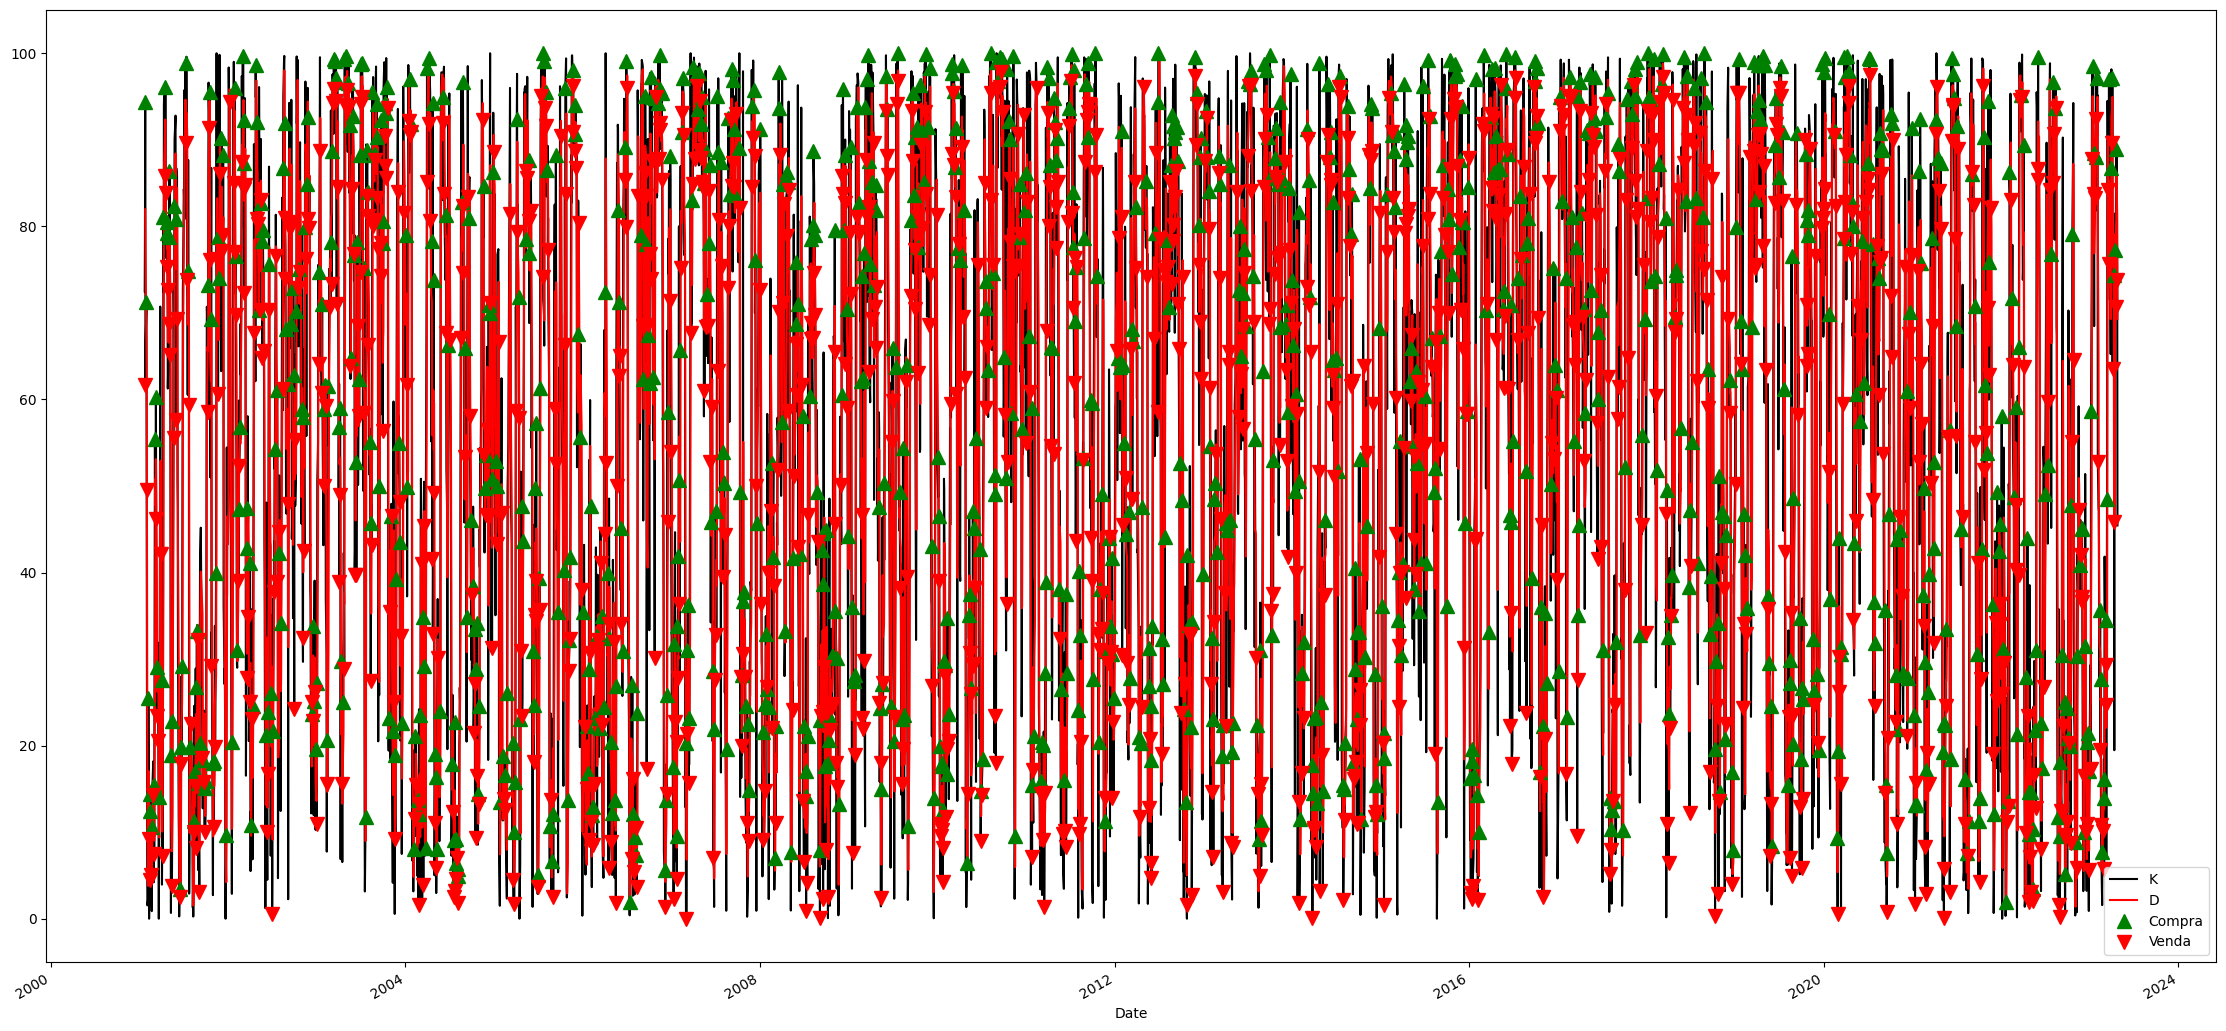

In [ ]:
plt.figure(figsize = (28,14))
dfEST['%K'].plot(color='k',label = "K")
dfEST['%D'].plot(color='r',label = "D")

plt.plot(dfEST[dfEST['POS']==1].index,
         dfEST['%K'][dfEST['POS']==1],
         '^', markersize = 10, color = 'g', label = 'Compra')

plt.plot(dfEST[dfEST['POS']==-1].index,
         dfEST['%K'][dfEST['POS']==-1],
         'v', markersize = 10, color = 'r', label = 'Venda')

plt.legend()

### Taxa de Acerto Estocástico

In [ ]:
dfEST = dfEST.loc[(dfEST['POS']!=0)]

In [ ]:
dfEST['DiffPreco'] = dfEST['Adj Close'].diff()

<ipython-input-74-20936791a61f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEST['DiffPreco'] = dfEST['Adj Close'].diff()


In [ ]:
dfEST['DiffPreco(%)'] = dfEST['Adj Close'].pct_change()

<ipython-input-75-628171fc57ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEST['DiffPreco(%)'] = dfEST['Adj Close'].pct_change()


In [ ]:
def new_column3(dfEST):
    if dfEST['POS'] == -1 and dfEST['DiffPreco']>0:
        return "Lucro"
    elif dfEST['POS'] == -1 and dfEST['DiffPreco']<0:
        return "Prejuízo"
    else:
        return ""

In [ ]:
dfEST['Lucro/Prejuízo'] = dfEST.apply(new_column3, axis=1)

In [ ]:
lucro_reais = dfEST.loc[dfEST['Lucro/Prejuízo']=='Lucro']['DiffPreco'].sum()
prejuízo_reais=dfEST.loc[dfEST['Lucro/Prejuízo']=='Prejuízo']['DiffPreco'].sum()
resultado_reais = lucro_reais+prejuízo_reais
print(resultado_reais)

92.04403123259544


In [ ]:
dfEST['DiffPreco'].sum()

105.5162490606308

In [ ]:
dfEST['Lucro/Prejuízo'].value_counts()

            1134
Prejuízo     663
Lucro        464
Name: Lucro/Prejuízo, dtype: int64

In [ ]:
precisao_EST = (151/240)*100
print(precisao_EST)

62.916666666666664


## **Bandas de Bollinger**

### Cálculo das Bandas de Bollinger

In [ ]:
dfBOLL= df.drop(['Open','High','Low','Close','Volume'],axis=1)

In [ ]:
dfBOLL.columns = {'CloseAdj'}

In [ ]:
dfBOLL['MMS_20']=dfBOLL['CloseAdj'].rolling(20).mean()

In [ ]:
desvio_padrao = dfBOLL['CloseAdj'].rolling(20).std()

In [ ]:
dfBOLL['Superior']=dfBOLL['MMS_20']+2*desvio_padrao

In [ ]:
dfBOLL['Inferior']=dfBOLL['MMS_20']-2*desvio_padrao

In [ ]:
dfBOLL

,CloseAdj,MMS_20,Superior,Inferior
Date,,,,
2001-01-02,0.693750,NaN,NaN,NaN
2001-01-03,0.878125,NaN,NaN,NaN
2001-01-04,0.775000,NaN,NaN,NaN
2001-01-05,0.728125,NaN,NaN,NaN
2001-01-08,0.746875,NaN,NaN,NaN
...,...,...,...,...
2023-04-19,104.300003,101.00250,105.420950,96.584050
2023-04-20,103.809998,101.25800,105.706719,96.809280
2023-04-21,106.959999,101.67050,106.625563,96.715436


### Gráfico Bandas de Bollinger

In [ ]:
dfBOLL['Sinal_Compra']=np.where(dfBOLL['Inferior']>dfBOLL['CloseAdj'],True,False)

In [ ]:
dfBOLL['Sinal_Venda']=np.where(dfBOLL['Superior']<dfBOLL['CloseAdj'],True,False)

In [ ]:
dfBOLL=dfBOLL.dropna()

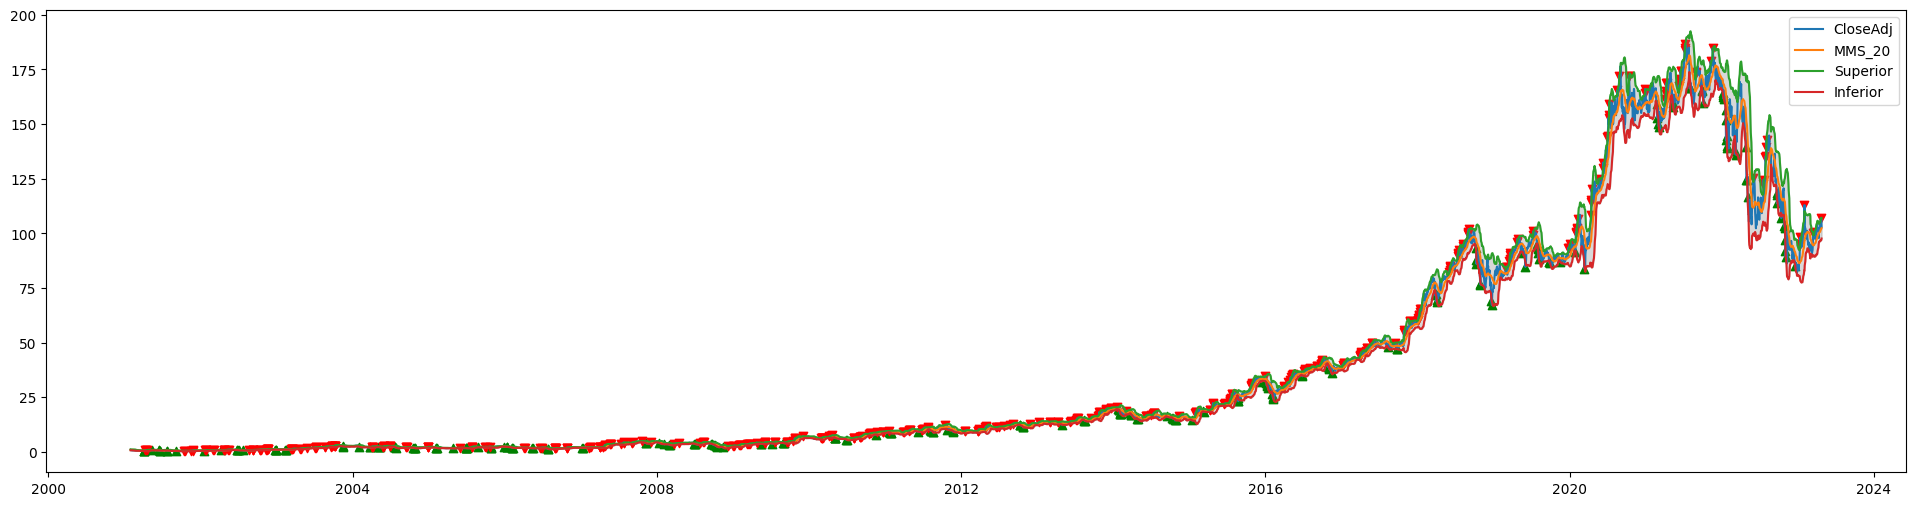

In [ ]:
plt.figure(figsize=(24,6))
plt.plot(dfBOLL[['CloseAdj','MMS_20','Superior','Inferior']])
plt.scatter(dfBOLL.index[dfBOLL.Sinal_Compra], dfBOLL[dfBOLL.Sinal_Compra].CloseAdj,marker = '^',color = 'g')
plt.scatter(dfBOLL.index[dfBOLL.Sinal_Venda], dfBOLL[dfBOLL.Sinal_Venda].CloseAdj,marker = 'v',color = 'r')
plt.fill_between(dfBOLL.index,dfBOLL['Superior'],dfBOLL['Inferior'], color='grey',alpha=0.3)
plt.legend(['CloseAdj','MMS_20','Superior','Inferior'])
plt.show()

In [ ]:
buys=[]
sells=[]
open_pos=False

In [ ]:
for i in range(len(dfBOLL)):
  if dfBOLL.Inferior[i] > dfBOLL.CloseAdj[i]:
    if open_pos == False:
       buys.append(i)
       open_pos=True
  elif dfBOLL.Superior[i]<dfBOLL.CloseAdj[i]:
    if open_pos:
      sells.append(i)
      open_pos=False

In [ ]:
buys

[43,
 72,
 239,
 297,
 349,
 477,
 702,
 815,
 868,
 933,
 1007,
 1107,
 1147,
 1191,
 1327,
 1370,
 1491,
 1704,
 1746,
 1862,
 1918,
 2082,
 2119,
 2158,
 2327,
 2464,
 2509,
 2602,
 2644,
 2702,
 2943,
 3078,
 3153,
 3265,
 3305,
 3426,
 3511,
 3547,
 3661,
 3740,
 3754,
 3874,
 3962,
 4158,
 4189,
 4316,
 4450,
 4598,
 4652,
 4776,
 4808,
 5046,
 5100,
 5157,
 5198,
 5267,
 5445]

In [ ]:
sells

[50,
 175,
 244,
 306,
 388,
 529,
 796,
 834,
 908,
 980,
 1088,
 1127,
 1173,
 1301,
 1354,
 1403,
 1512,
 1720,
 1794,
 1880,
 1975,
 2094,
 2128,
 2169,
 2391,
 2470,
 2556,
 2617,
 2694,
 2758,
 2976,
 3106,
 3177,
 3292,
 3356,
 3470,
 3521,
 3567,
 3706,
 3751,
 3812,
 3881,
 4009,
 4181,
 4213,
 4361,
 4548,
 4637,
 4756,
 4780,
 4829,
 5075,
 5122,
 5179,
 5228,
 5369,
 5522]

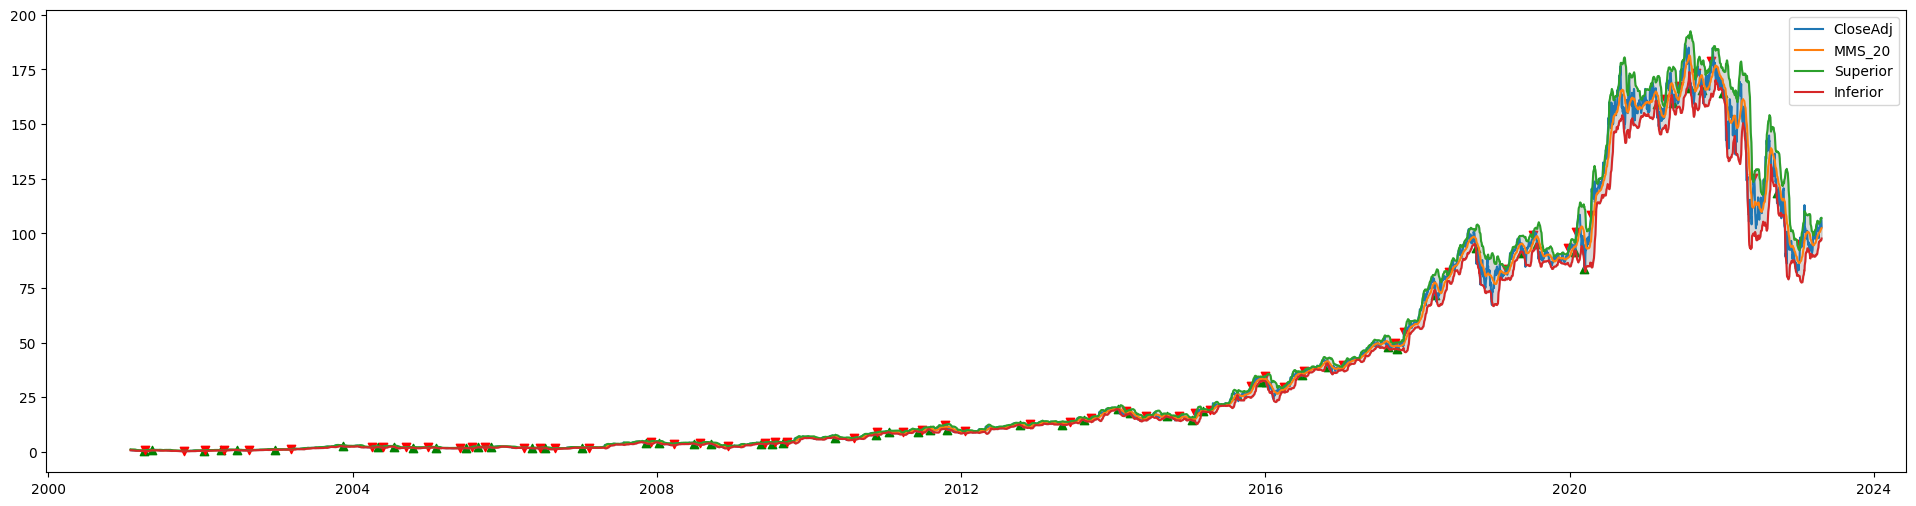

In [ ]:
plt.figure(figsize=(24,6))
plt.plot(dfBOLL[['CloseAdj','MMS_20','Superior','Inferior']])
plt.scatter(dfBOLL.iloc[buys].index, dfBOLL.iloc[buys].CloseAdj,marker = '^',color = 'g')
plt.scatter(dfBOLL.iloc[sells].index, dfBOLL.iloc[sells].CloseAdj,marker = 'v',color = 'r')
plt.fill_between(dfBOLL.index,dfBOLL['Superior'],dfBOLL['Inferior'], color='grey',alpha=0.3)
plt.legend(['CloseAdj','MMS_20','Superior','Inferior'])
plt.show()

In [ ]:
dfBOLL

,CloseAdj,MMS_20,Superior,Inferior,Sinal_Compra,Sinal_Venda
Date,,,,,,
2001-01-30,0.946875,0.891914,1.098496,0.685332,False,False
2001-01-31,0.865625,0.900508,1.085558,0.715458,False,False
2001-02-01,0.812500,0.897227,1.086233,0.708220,False,False
2001-02-02,0.718750,0.894414,1.092533,0.696296,False,False
2001-02-05,0.721875,0.894102,1.093341,0.694862,False,False
...,...,...,...,...,...,...
2023-04-19,104.300003,101.002500,105.420950,96.584050,False,False
2023-04-20,103.809998,101.258000,105.706719,96.809280,False,False
2023-04-21,106.959999,101.670500,106.625563,96.715436,False,True


In [ ]:
merged = pd.concat([dfBOLL.iloc[buys].CloseAdj, dfBOLL.iloc[sells].CloseAdj],axis=1)

In [ ]:
merged

,CloseAdj,CloseAdj
Date,,
2001-04-02,0.455000,NaN
2001-04-11,NaN,0.666000
2001-05-14,0.666500,NaN
2001-10-15,NaN,0.444000
2002-01-16,0.456500,NaN
...,...,...
2021-11-09,NaN,178.811493
2022-01-05,164.356995,NaN
2022-06-02,NaN,125.511002


In [ ]:
merged.columns = ['Buys','Sells']

In [ ]:
lucrototal = merged.shift(-1).Sells - merged.Buys

In [ ]:
lucrototal.sum()

38.14998534321785

In [ ]:
#lucro = lucrototal/merged.Buys

In [ ]:
#lucro.mean()

### BOLL2

In [ ]:
dfBOLL2 = df.reset_index()

In [ ]:
dfBOLL2.drop(['Open','High','Low','Close','Volume'],axis=1)

,Date,Adj Close
0,2001-01-02,0.693750
1,2001-01-03,0.878125
2,2001-01-04,0.775000
3,2001-01-05,0.728125
4,2001-01-08,0.746875
...,...,...
5608,2023-04-19,104.300003
5609,2023-04-20,103.809998
5610,2023-04-21,106.959999
5611,2023-04-24,106.209999


In [ ]:
dfBOLL2['sma'] = dfBOLL2['Adj Close'].rolling(20).mean()

In [ ]:
dfBOLL2['sd'] = dfBOLL2['Adj Close'].rolling(20).std()

In [ ]:
dfBOLL2['lb'] = dfBOLL2['sma'] - 2 * dfBOLL2['sd']

In [ ]:
dfBOLL2['ub'] = dfBOLL2['sma'] + 2 * dfBOLL2['sd']

In [ ]:
dfBOLL2.dropna(inplace=True)

In [ ]:
fig = px.line(dfBOLL2, x= 'Date', y=['Adj Close', 'sma', 'lb', 'ub'])
fig

In [ ]:
def find_signal(close, lower_band, upper_band):
    if close < lower_band:
        return 'buy'
    elif close > upper_band:
        return 'sell'

In [ ]:
dfBOLL2['signal'] = np.vectorize(find_signal)(dfBOLL2['Adj Close'], dfBOLL2['lb'], dfBOLL2['ub'])

In [ ]:
class Position:
    def __init__(self, open_datetime, open_price, order_type, volume, sl, tp):
        self.open_datetime = open_datetime
        self.open_price = open_price
        self.order_type = order_type
        self.volume = volume
        self.sl = sl
        self.tp = tp
        self.close_datetime = None
        self.close_price = None
        self.profit = None
        self.status = 'open'
        
    def close_position(self, close_datetime, close_price):
        self.close_datetime = close_datetime
        self.close_price = close_price
        self.profit = (self.close_price - self.open_price) * self.volume if self.order_type == 'buy'\
                                                                        else (self.open_price - self.close_price) * self.volume
        self.status = 'closed'
    
    def _asdict(self):
        return {
            'open_datetime': self.open_datetime,
            'open_price': self.open_price,
            'order_type': self.order_type,
            'volume': self.volume,
            'sl': self.sl,
            'tp': self.tp,
            'close_datetime': self.close_datetime,
            'close_price': self.close_price,
            'profit': self.profit,
            'status': self.status,
        }  

class Strategy:
    def __init__(self, dfBOLL2, starting_balance, volume):
        self.starting_balance = starting_balance
        self.volume = volume
        self.positions = []
        self.data = dfBOLL2

    def get_positions_df(self):
        dfBOLL2 = pd.DataFrame([position._asdict() for position in self.positions])
        dfBOLL2['pnl'] = dfBOLL2['profit'].cumsum() + self.starting_balance
        return dfBOLL2
    
    def add_position(self, position):
        self.positions.append(position)
    
    def trading_allowed(self):
        for pos in self.positions:
            if pos.status == 'open':
                return False
    
        return True
    
    def run(self):
        for i, data in self.data.iterrows():
            if data.signal == 'buy' and self.trading_allowed():
                sl = data['Adj Close'] - 3 * data.sd
                tp = data['Adj Close'] + 2 * data.sd
                self.add_position(Position(data.Date, data['Adj Close'], data.signal, self.volume, sl, tp))
            elif data.signal == 'sell' and self.trading_allowed():
                sl = data['Adj Close'] + 3 * data.sd
                tp = data['Adj Close'] - 2 * data.sd
                self.add_position(Position(data.Date, data['Adj Close'], data.signal, self.volume, sl, tp))
    
            for pos in self.positions:
                if pos.status == 'open':
                    if (pos.sl >= data['Adj Close'] and pos.order_type == 'buy'):
                        pos.close_position(data.Date, pos.sl)
                    elif (pos.sl <= data['Adj Close'] and pos.order_type == 'sell'):
                        pos.close_position(data.Date, pos.sl)
                    elif (pos.tp <= data['Adj Close'] and pos.order_type == 'buy'):
                        pos.close_position(data.Date, pos.tp)
                    elif (pos.tp >= data['Adj Close'] and pos.order_type == 'sell'):
                        pos.close_position(data.Date, pos.tp)
        return self.get_positions_df()

In [ ]:
bollinger_strategy = Strategy(dfBOLL2, 10000, 100000)
result = bollinger_strategy.run()
result

,open_datetime,open_price,order_type,volume,sl,tp,close_datetime,close_price,profit,status,pnl
0,2001-04-02,0.455000,buy,100000,0.332567,0.536622,2001-04-09,0.536622,8.162187e+03,closed,1.816219e+04
1,2001-04-11,0.666000,sell,100000,0.852197,0.541869,2001-05-02,0.852197,-1.861968e+04,closed,-4.574947e+02
2,2001-05-14,0.666500,buy,100000,0.512433,0.769211,2001-05-21,0.769211,1.027111e+04,closed,9.813614e+03
3,2001-06-14,0.664500,buy,100000,0.500725,0.773683,2001-07-09,0.773683,1.091832e+04,closed,2.073194e+04
4,2001-07-24,0.603000,buy,100000,0.408859,0.732427,2001-09-05,0.408859,-1.941409e+04,closed,1.317847e+03
...,...,...,...,...,...,...,...,...,...,...,...
153,2022-07-20,122.769997,sell,100000,134.762067,114.775283,2022-07-29,134.762067,-1.199207e+06,closed,1.128561e+05
154,2022-08-01,135.389999,sell,100000,157.473857,120.667427,2022-09-21,120.667427,1.472257e+06,closed,1.585113e+06
155,2022-09-22,117.309998,buy,100000,102.273893,127.334067,2022-11-01,102.273893,-1.503610e+06,closed,8.150281e+04
156,2022-11-02,92.120003,buy,100000,68.871253,107.619169,2023-02-02,107.619169,1.549917e+06,closed,1.631419e+06


In [ ]:
fig = px.line(dfBOLL2, x='Date', y=['Adj Close', 'sma', 'lb', 'ub'])

In [ ]:
for i, position in result.iterrows():
    if position.status == 'closed':
        fig.add_shape(type="line",
            x0=position.open_datetime, y0=position.open_price, x1=position.close_datetime, y1=position.close_price,
            line=dict(
                color="green" if position.profit >= 0 else "red",
                width=3))
fig

KeyboardInterrupt: ignored

In [ ]:
px.line(result, x='close_datetime', y='pnl')

https://www.youtube.com/watch?v=AIDKh55y64A

## **RSI**

In [ ]:
dfRSI = df.reset_index()

In [ ]:
dfRSI

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,0.790625,0.800000,0.681250,0.693750,0.693750,184070000
1,2001-01-03,0.681250,0.893750,0.678125,0.878125,0.878125,293608000
2,2001-01-04,0.850000,0.878125,0.771875,0.775000,0.775000,212410000
3,2001-01-05,0.775000,0.793750,0.678125,0.728125,0.728125,175976000
4,2001-01-08,0.721875,0.778125,0.687500,0.746875,0.746875,208894000
...,...,...,...,...,...,...,...
5608,2023-04-19,101.580002,105.120003,101.389999,104.300003,104.300003,58398900
5609,2023-04-20,103.529999,105.250000,103.209999,103.809998,103.809998,57696900
5610,2023-04-21,106.099998,108.150002,105.080002,106.959999,106.959999,86689700
5611,2023-04-24,107.660004,109.230003,105.070000,106.209999,106.209999,69513400


In [ ]:
dfRSI= df.drop(['Open','High','Low','Volume'],axis=1)
rsi = talib.RSI(dfRSI['Adj Close'])

# Calcular o MACD
macd, signal, hist = talib.MACD(dfRSI['Adj Close'])
dfRSI['rsi14']=rsi
# Identificar os pontos de compra e venda
for i in range(1, len(dfRSI)):
    if rsi[i] < 30 and macd[i] > signal[i]:
        dfRSI['Compra/Venda'] = "Compra"
    elif rsi[i] > 70 and macd[i] < signal[i]:
        dfRSI['Compra/Venda'] = "Venda"

In [ ]:
dfRSI

,Close,Adj Close,rsi14,Compra/Venda
Date,,,,
2001-01-02,0.693750,0.693750,NaN,Venda
2001-01-03,0.878125,0.878125,NaN,Venda
2001-01-04,0.775000,0.775000,NaN,Venda
2001-01-05,0.728125,0.728125,NaN,Venda
2001-01-08,0.746875,0.746875,NaN,Venda
...,...,...,...,...
2023-04-19,104.300003,104.300003,60.327590,Venda
2023-04-20,103.809998,103.809998,58.839109,Venda
2023-04-21,106.959999,106.959999,64.844191,Venda


In [ ]:
dfRSI[dfRSI['rsi14'].notnull()]

,Close,Adj Close,rsi14,Compra/Venda
Date,,,,
2001-01-23,0.947656,0.947656,68.197074,Venda
2001-01-24,1.093750,1.093750,74.049342,Venda
2001-01-25,0.950000,0.950000,61.966381,Venda
2001-01-26,0.975000,0.975000,63.094263,Venda
2001-01-29,1.006250,1.006250,64.510982,Venda
...,...,...,...,...
2023-04-19,104.300003,104.300003,60.327590,Venda
2023-04-20,103.809998,103.809998,58.839109,Venda
2023-04-21,106.959999,106.959999,64.844191,Venda


https://stackoverflow.com/questions/20526414/relative-strength-index-in-python-pandas

# **Testes com dois indicadores simultâneos**

<ipython-input-156-b80a37fbf68d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-b80a37fbf68d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-b80a37fbf68d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



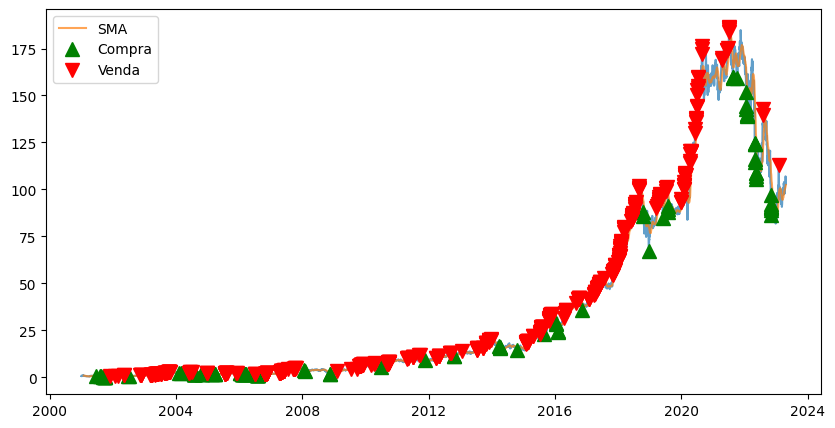

Lucro/prejuízo total: 101.63%


In [ ]:
df2_2 = df.drop(['Open','High','Low','Volume'], axis = 1)
df2_2['SMA'] = talib.SMA(df2_2['Adj Close'], timeperiod=20)
df2_2['RSI'] = talib.RSI(df2_2['Adj Close'], timeperiod=14)
df2_2['Sinais'] = 0
df2_2['Sinais'][20:] = np.where(df2_2['SMA'][20:] < df2_2['Close'][20:], 1, 0)
df2_2['Sinais'][20:] = np.where(df2_2['RSI'][20:] < 30, 1, 0)
df2_2['Sinais'][20:] = np.where(df2_2['RSI'][20:] > 70, -1, df2_2['Sinais'][20:])
df2_2['Retornos'] = np.log(df2_2['Adj Close']/df2_2['Adj Close'].shift(1))
df2_2['Estrategia'] = df2_2['Retornos'] * df2_2['Sinais'].shift(1)

plt.figure(figsize=(10,5))
plt.plot(df2_2['Close'], alpha=0.7)
plt.plot(df2_2['SMA'], label='SMA', alpha=0.7)
plt.plot(df2_2[df2_2['Sinais'] == 1]['Adj Close'], '^', markersize=10, color='g', label='Compra')
plt.plot(df2_2[df2_2['Sinais'] == -1]['Adj Close'], 'v', markersize=10, color='r', label='Venda')
plt.legend()
plt.show()
lucro_prejuizo = df2_2['Estrategia'].sum()
print('Lucro/prejuízo total: {:.2%}'.format(lucro_prejuizo))

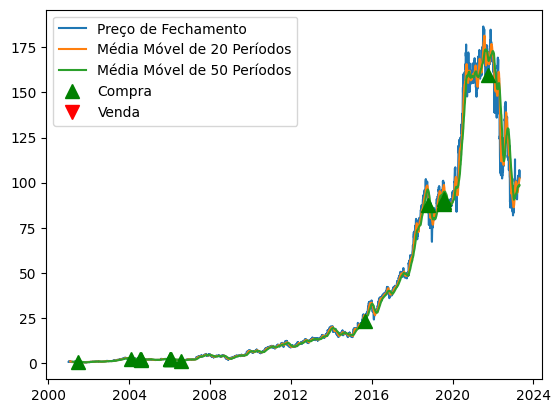

Número de negociações: 37
Retorno total: 4.70%
Número de negociações: 22


In [ ]:
df2_3 = df.drop(['Open','High','Low','Volume'], axis = 1)
df2_3['MA20'] = talib.SMA(df2_3['Close'], timeperiod=20)
df2_3['MA50'] = talib.SMA(df2_3['Close'], timeperiod=50)
df2_3['RSI14'] = talib.RSI(df2_3['Close'], timeperiod=14)

df2_3['Compra'] = ((df2_3['MA20'] > df2_3['MA50']) & (df2_3['RSI14'] < 30)).astype(int)
df2_3['Venda'] = ((df2_3['MA20'] < df2_3['MA50']) & (df2_3['RSI14'] > 70)).astype(int)

plt.plot(df2_3['Close'], label='Preço de Fechamento')
plt.plot(df2_3['MA20'], label='Média Móvel de 20 Períodos')
plt.plot(df2_3['MA50'], label='Média Móvel de 50 Períodos')
plt.plot(df2_3[df2_3['Compra'] == 1]['Close'], '^', markersize=10, color='g', label='Compra')
plt.plot(df2_3[df2_3['Venda'] == -1]['Close'], 'v', markersize=10, color='r', label='Venda')
plt.legend()
plt.show()

# calcule o retorno de cada negociação
df2_3['retorno'] = df2_3['Close'].pct_change() * df2_3['Compra'].shift(1)

# calcule o retorno acumulado
df2_3['retorno_acumulado'] = (df2_3['retorno'] + 1).cumprod()

# calcule o número de negociações
num_compras = df2_3['Compra'].sum()
num_vendas = df2_3['Venda'].sum()

# calcule o retorno total
retorno_total = df2_3['retorno_acumulado'][-1] - 1

print(f'Número de negociações: {num_compras + num_vendas}')
print(f'Retorno total: {retorno_total:.2%}')

## MACD e RSI

In [ ]:
dfMERGED1 = pd.merge(dfMACD, dfRSI, on = "Date")

In [ ]:
dfMERGED1.head()

,Adj Close_x,macd,exp3,Sinal,POS,DiffPreco,DiffPreco(%),Lucro/Prejuízo,Close,Adj Close_y,rsi14,Compra/Venda
Date,,,,,,,,,,,,
2001-01-02,0.693750,0.000000,0.000000,0,NaN,NaN,NaN,,0.693750,0.693750,NaN,Venda
2001-01-03,0.878125,0.014708,0.002942,1,1.0,0.184375,0.265766,,0.878125,0.878125,NaN,Venda
2001-01-31,0.865625,0.056754,0.063754,0,-1.0,-0.012500,-0.014235,Prejuízo,0.865625,0.865625,54.015732,Venda
2001-03-07,0.612500,-0.058055,-0.061732,1,1.0,-0.253125,-0.292419,,0.612500,0.612500,46.394645,Venda
2001-04-03,0.431500,-0.042113,-0.040188,0,-1.0,-0.181000,-0.295510,Prejuízo,0.431500,0.431500,35.173726,Venda


In [ ]:
def new_column06(dfMERGED1):
    if dfMERGED1['POS'] == 1 and dfMERGED1['rsi14']< 30:
        return "Compra"
    elif dfMERGED1['POS'] == -1 and dfMERGED1['rsi14']> 70:
        return "Venda"
    else:
        return ""

In [ ]:
dfMERGED1.head()

,Adj Close_x,macd,exp3,Sinal,POS,DiffPreco,DiffPreco(%),Lucro/Prejuízo,Close,Adj Close_y,rsi14,Compra/Venda
Date,,,,,,,,,,,,
2001-01-02,0.693750,0.000000,0.000000,0,NaN,NaN,NaN,,0.693750,0.693750,NaN,Venda
2001-01-03,0.878125,0.014708,0.002942,1,1.0,0.184375,0.265766,,0.878125,0.878125,NaN,Venda
2001-01-31,0.865625,0.056754,0.063754,0,-1.0,-0.012500,-0.014235,Prejuízo,0.865625,0.865625,54.015732,Venda
2001-03-07,0.612500,-0.058055,-0.061732,1,1.0,-0.253125,-0.292419,,0.612500,0.612500,46.394645,Venda
2001-04-03,0.431500,-0.042113,-0.040188,0,-1.0,-0.181000,-0.295510,Prejuízo,0.431500,0.431500,35.173726,Venda


In [ ]:
dfMERGED1['Compra/Venda'] = dfMERGED1.apply(new_column06, axis=1)

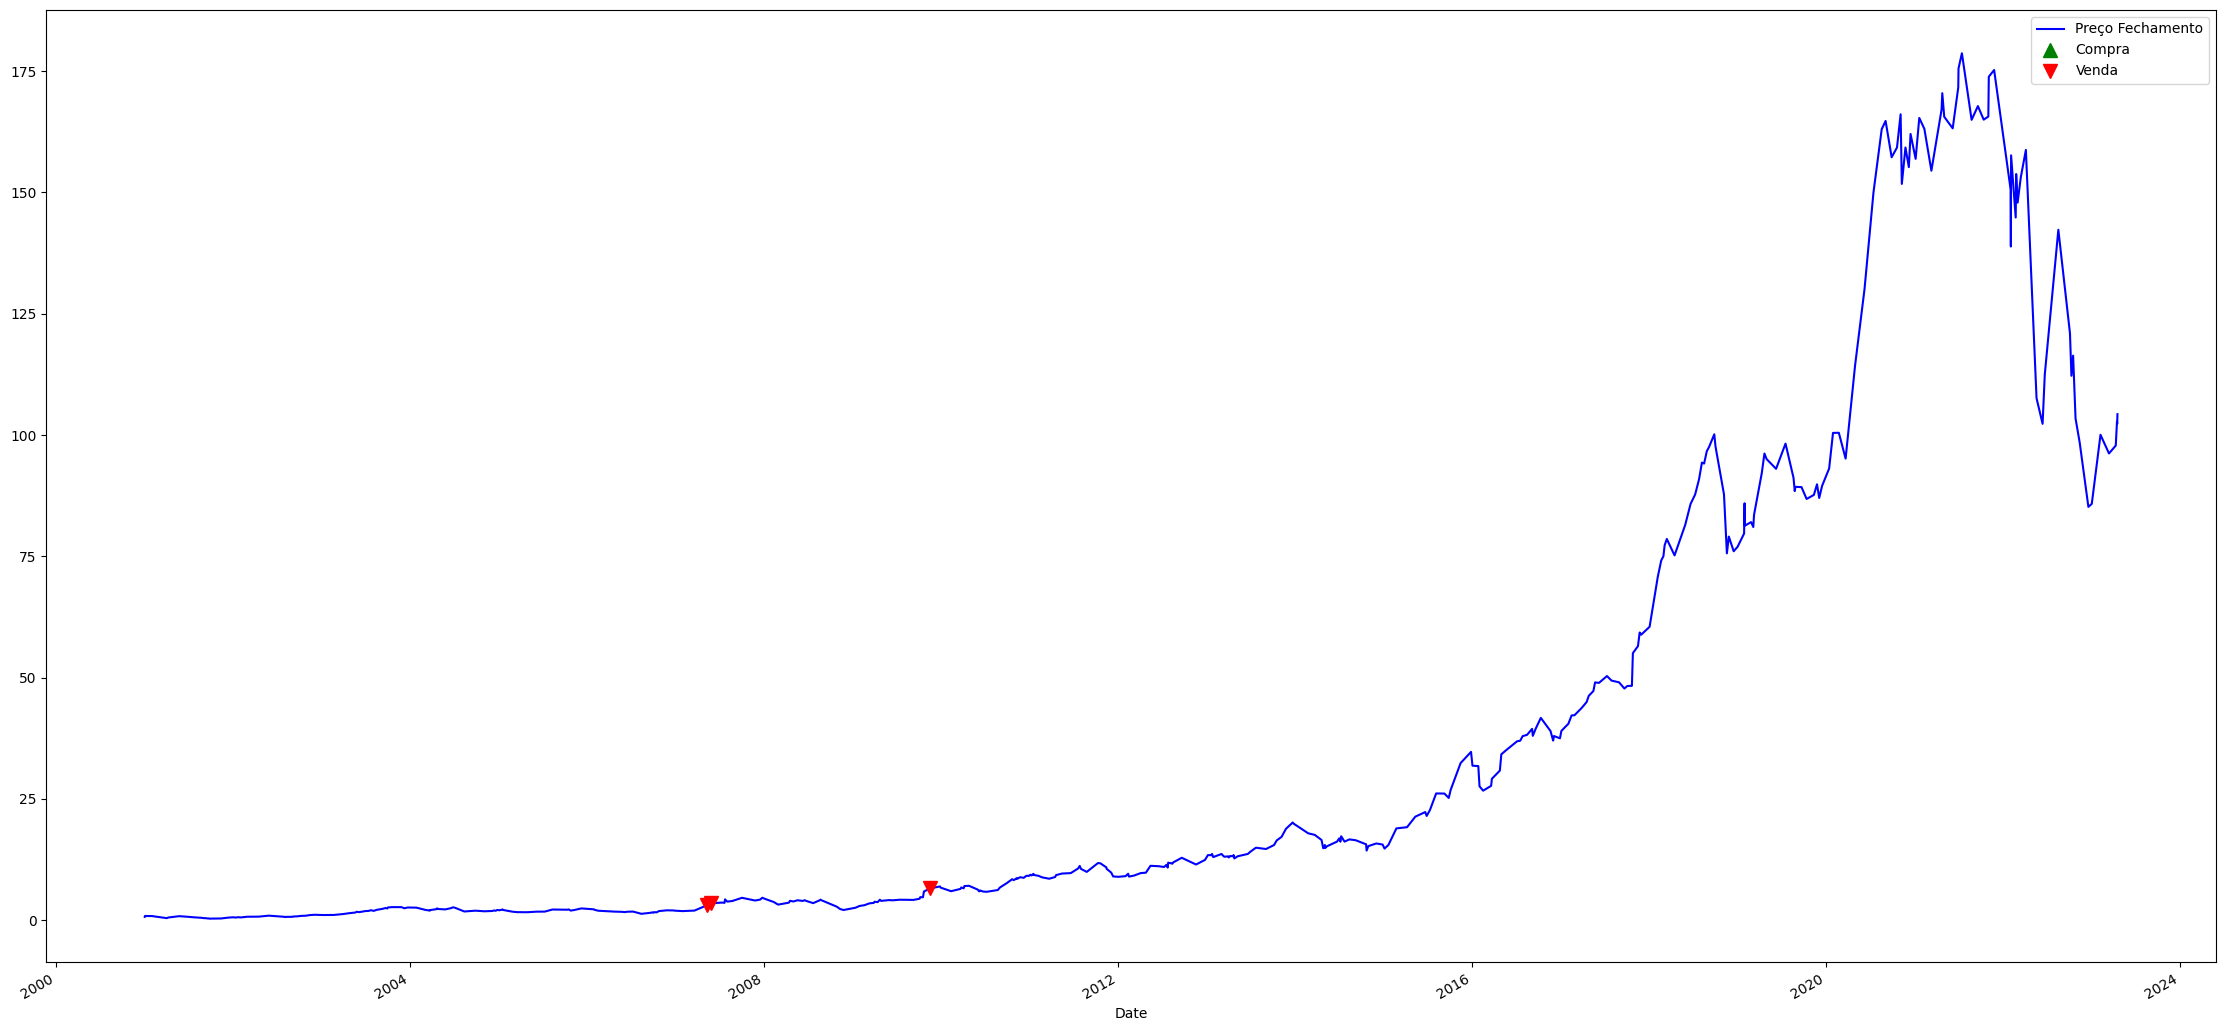

In [ ]:
plt.figure(figsize = (28,14))
dfMERGED1['Adj Close_x'].plot(color='b',label = "Preço Fechamento")

plt.plot(dfMERGED1[dfMERGED1['Compra/Venda']=="Compra"].index,
         dfMERGED1['Adj Close_x'][dfMERGED1['Compra/Venda']=="Compra"],
         '^', markersize = 10, color = 'g', label = 'Compra')

plt.plot(dfMERGED1[dfMERGED1['Compra/Venda']=="Venda"].index,
         dfMERGED1['Adj Close_x'][dfMERGED1['Compra/Venda']=="Venda"],
         'v', markersize = 10, color = 'r', label = 'Venda')

plt.legend()

## BOLL e RSI

In [ ]:
dfMERGED2 = pd.merge(dfBOLL, dfRSI, on = "Date")

In [ ]:
def new_column05(dfMERGED2):
    if dfMERGED2['Sinal_Compra'] == True and dfMERGED2['rsi14']< 30:
        return "Compra"
    elif dfMERGED2['Sinal_Venda'] == True and dfMERGED2['rsi14']> 70:
        return "Venda"
    else:
        return ""

In [ ]:
dfMERGED2['Compra/Venda'] = dfMERGED2.apply(new_column05, axis=1)

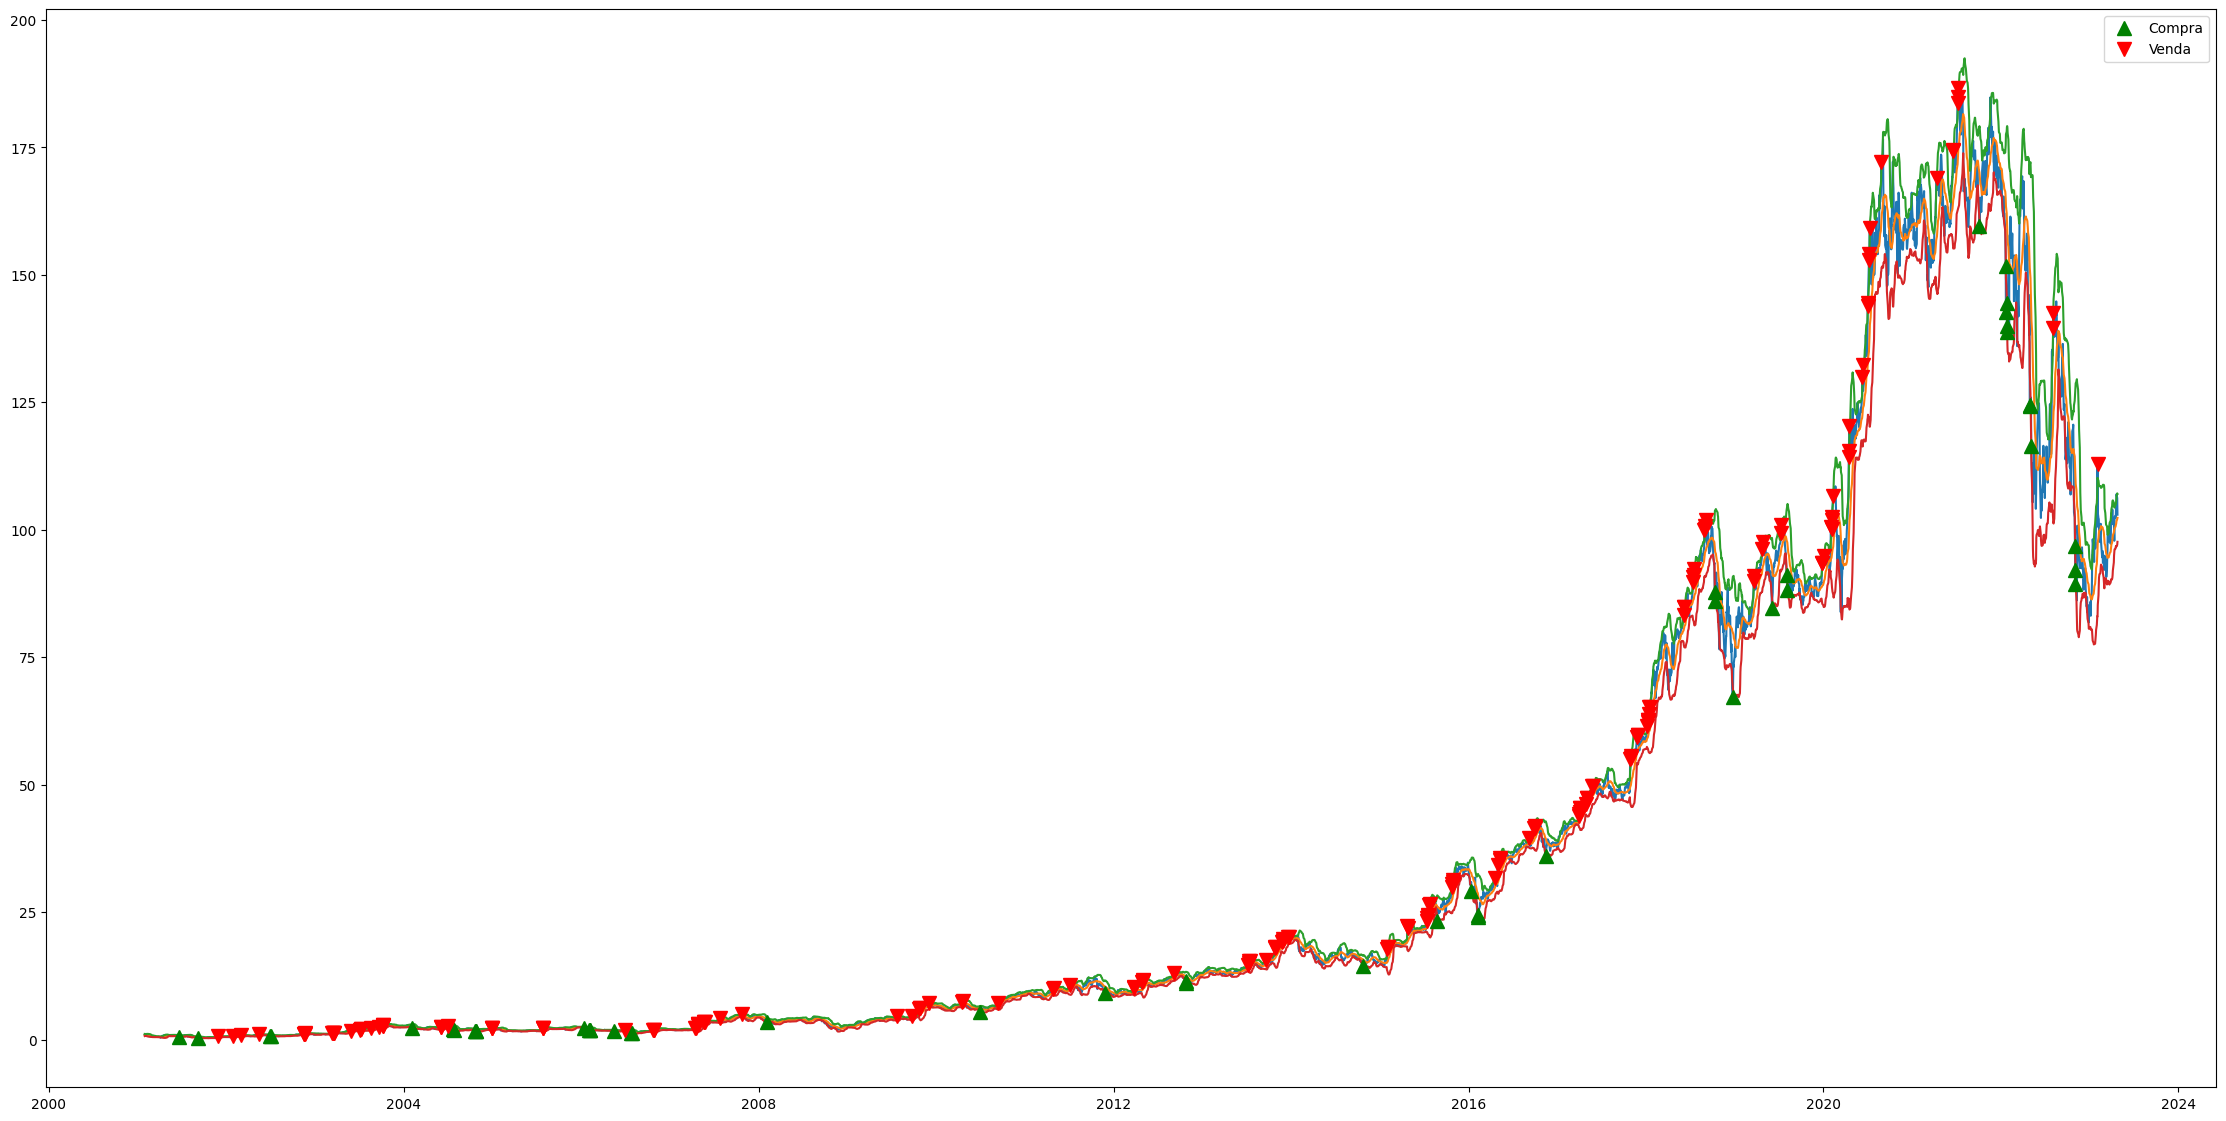

In [ ]:
plt.figure(figsize = (28,14))
plt.plot(dfMERGED2[['CloseAdj','MMS_20','Superior','Inferior',]])

plt.plot(dfMERGED2[dfMERGED2['Compra/Venda']=="Compra"].index,
         dfMERGED2['CloseAdj'][dfMERGED2['Compra/Venda']=="Compra"],
         '^', markersize = 10, color = 'g', label = 'Compra')

plt.plot(dfMERGED2[dfMERGED2['Compra/Venda']=="Venda"].index,
         dfMERGED2['CloseAdj'][dfMERGED2['Compra/Venda']=="Venda"],
         'v', markersize = 10, color = 'r', label = 'Venda')

plt.legend()

Média Móvel Simples e RSI

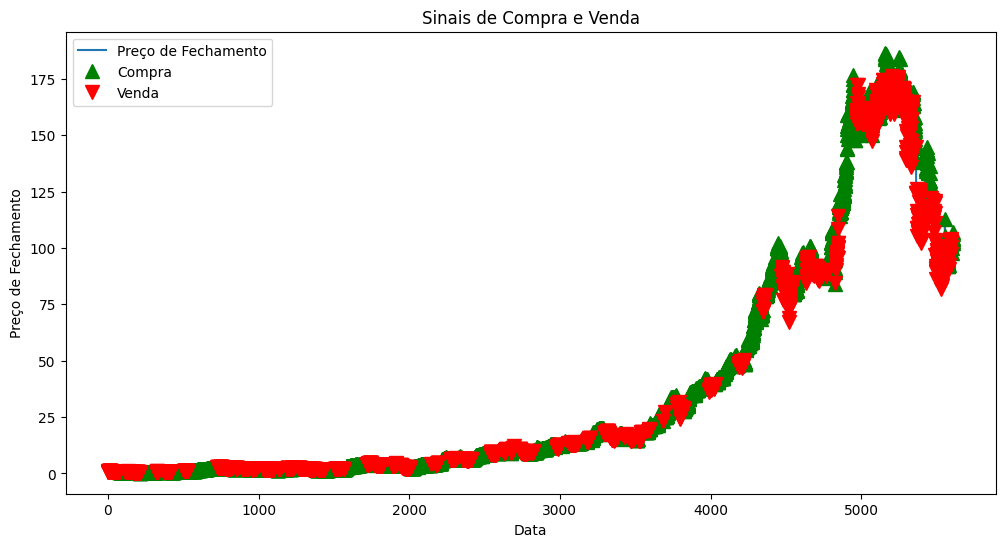

In [ ]:
dfMERGED03 = df.reset_index()
dfMERGED03['SMA20'] = talib.SMA(dfMERGED03['Adj Close'], timeperiod=20)
dfMERGED03['SMA50'] = talib.SMA(dfMERGED03['Adj Close'], timeperiod=50)
dfMERGED03['RSI14'] = talib.RSI(dfMERGED03['Adj Close'], timeperiod=14)
dfMERGED03['Signal'] = np.where((dfMERGED03['SMA20'] > dfMERGED03['SMA50']) & (dfMERGED03['RSI14'] > 30), 1, -1)
plt.figure(figsize=(12, 6))
plt.plot(dfMERGED03['Adj Close'], label='Preço de Fechamento')
plt.plot(dfMERGED03[dfMERGED03['Signal']==1].index,dfMERGED03['Adj Close'][dfMERGED03['Signal']==1],'^', markersize = 10, color = 'g', label = 'Compra')
plt.plot(dfMERGED03[dfMERGED03['Signal']==-1].index,dfMERGED03['Adj Close'][dfMERGED03['Signal']==-1],'v', markersize = 10, color = 'r', label = 'Venda')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Sinais de Compra e Venda')
plt.legend()
plt.show()

# **Modelo de Predição**

## **Texto**

In [ ]:
close_prices = df['Adj Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
4431/4431 [==============================] - 175s 38ms/step - loss: 4.2973e-04
Epoch 2/3
4431/4431 [==============================] - 166s 38ms/step - loss: 1.3597e-04
Epoch 3/3
4431/4431 [==============================] - 160s 36ms/step - loss: 6.5840e-05


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

36/36 [==============================] - 2s 29ms/step


4.1351664334057485

<ipython-input-178-0fa53b6bfd6a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



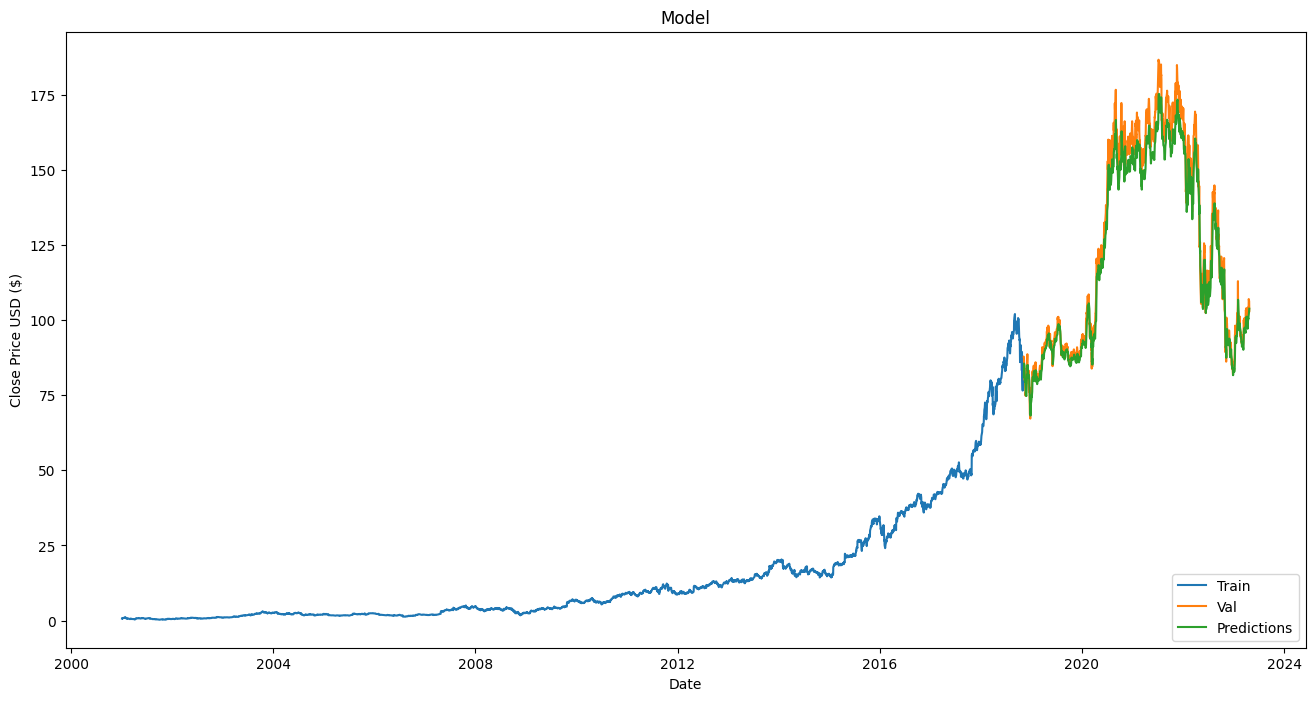

In [ ]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827